<a href="https://colab.research.google.com/github/kc2029/kc2029/blob/main/Copy_of_Copy_of_Kevin_%26_Peter_F21DF_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# F21DF 2021-22 Coursework 1


| **Author** | **Username** |
| ---- | ---- |
| Kevin Chen | KC2029 |
| Peter L Cseh | PLC2000 |

Students have been supplied this skeleton notebook for completing their F21DF coursework. It uses the same approach as all other [Colab notebooks](https://drive.google.com/drive/folders/1QmGgIRv0ui1q9x1wWbJRO9-FqcWtJQf3) in this course.

Students are required to complete all sections of this notebook to meet the requirements in the coursework specification. The notebook should be submitted through Canvas with the output of computations shown.

# 1. Entity Relationship Design

Note that each student should work on their own design initially and then share them here. You should jointly critque each design and then come up with an agreed joint design.

## a) Initial Designs [10 Marks]

### Design 1 ER Diagram - Kevin
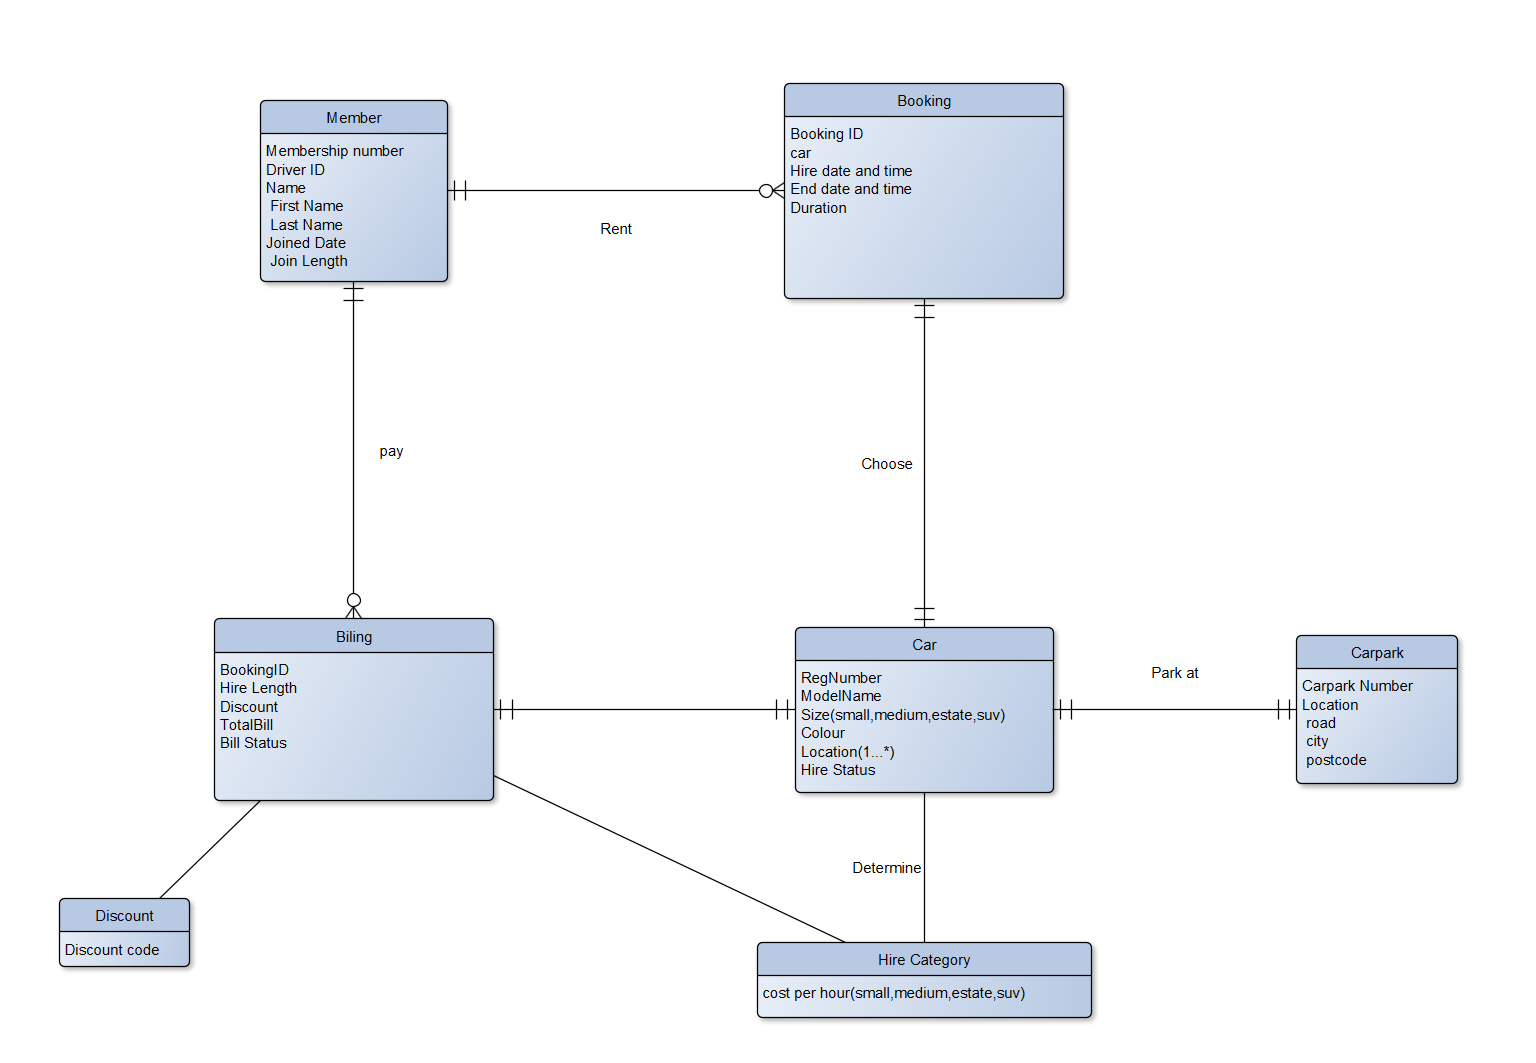

### Critque of Design 1
*   Missing notations of the relationship
   *   Booking - Car: I believe it should be as: Bookings must mandatorily have a car associated with them, and multiple bookings can be associated with one car. Your relationship says that 1 car can only have 1 booking and vica versa
   *   Car - carpark: I wouldn't use 1mandatory - 1mandatory as some carparks will be free and there's definitely more carpark than cars
*   Booking.BookingID - great idea
*   Booking.car redundant as BookingID would end up in Car as a FK
*   In Booking I would include the timestamp when an order is placed for a hire
*   Duration can be deducted which is not noted in this diagram. I used '/' as the lecturer suggested. Same applies for Join Length
*   I attempted the Billing part differently. I wouldn't include Billing in a separate entity as it doesn't seem to be required from the text.  Rather I included the total price paid under Booking(Hires), as well as cost per hours, discount
*   Wouldn't include ModelName as the requirement didn't sayso
*   It is reasonable to have a separate entity for the hire category, so we reduce the amount of duplicates in our car table
*   I wouldn't include Car.hireStatus as we can deduct it from the Bookings table
*   I think its enough to have Car.location in a seperate entity and no need to include it Car



### Design 2 ER Diagram - Peter 
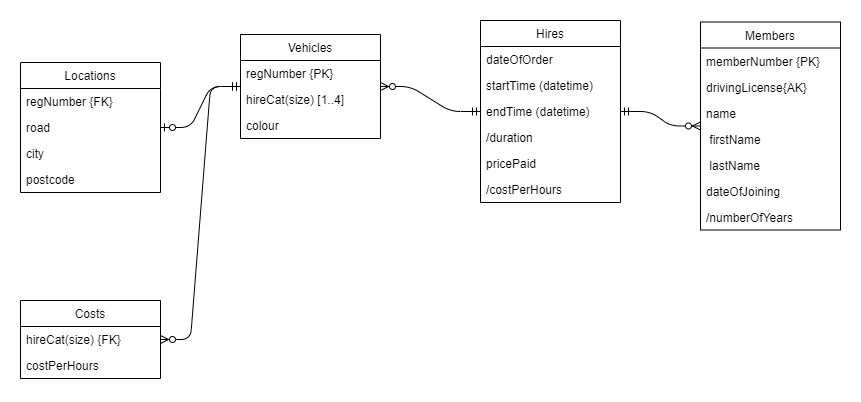

### Critque of Design 2
 Critique of design
- 	No reference to discount
-	Hiring should have unique identifier to identify each booking, and as primary Key
-	Should have discount as separate entities, which is use to confirm discount code  and select discount %
- 1:M relationship should be the other way around.
- locationID instead of regNumber


## b) Consolidate Design [10 Marks]


### Consolidated ER Diagram

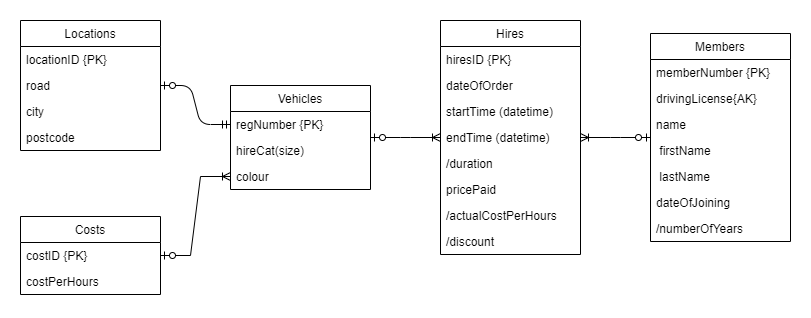

### Discussion of Consolidated Design
*   Hires.pricepaid = Hires.actualCostPerHours × Hires.duration
*   Hires.duration = Hires.endTime - Hires.startTime
*   Hires.actualCostPerHours = Hires.pricePaid / Hires.duration
*   Hires.discount = Hires.actualCostPerHours / Costs.costPerHours
*   Members.numberOfYears = dateOfJoining - {acutal date}


-Instead of separating Booking and Billing of design 1, we decided to combine them into Hiring of design 2 to simplify the design of the database.

-Though its useful for customer to rent car to know the model name, we removed ModelName attribute from design 1 since it was not a criteria in the assignment




# 2. Relational Schema [10 Marks]

*__ToDo:__ Translate your consolidated design into a relational schema. Provide data types for each attribute, identify primary keys, foreign keys, and other constraints.*

Locations (**locationID: SMALLINT**, road:VARCHAR(100), city:VARCHAR(100), postcode:VARCHAR(7)) 

Vehicles (**regNumber:CHAR(5)**, hireCat(size):TINYINT, colour: VARCHAR(20), vcostID:TINYINT, vlocationID:SMALLINT) 

*   vcostID is referencing Costs.costID 
*   vlocationID is referencing Locations.locationID  

Hires (**hiresID:INT**, dateOfOrder:TIMESTAMP, startTime:DATETIME, endTime:DATETIME, pricePaid:DECIMAL(5,2), hregNumbe:CHAR(5), hmemberNumber:INT) 

*   hregNumber is referencing Vehicles.regNumber 
*   hmemeberNumber is referencing Members.memberNumber 

Members (**memberNumber:INTIGER**, drivingLicense:CHAR(11), firstName:VARCHAR(50), lastName:VARCHAR(50), dateOfJoining:DATE) 

Costs (**costID:TINYINT**, costPerHours:TINYINT) 

**PK are bold**

NOTES:
**Hires.dateOfOrder - theoretically is TIMESTAMP, technically DATETIME**
**PRICE PAID CHAGED FOR DECIAL**

# 3. Database Implementation [10 Marks]

*__ToDo:__ Implement your relational schema as a MySQL database and insert sample data to allow you to answer the queries required.*

## Install and Run MySQL

The code in this section has been provided to install and run the MySQL database management system on the Google compute infrastructure. There should be no need to edit this section.

### Install MySQL 5.7
This process can take a little while to complete.

The output is redirected to not display on screen. Only warnings and errors will be displayed by the following code.

When it is finished you should get something similar to the following output
```
WARNING: apt does not have a stable CLI interface. Use with caution in scripts.

E: Sub-process /usr/bin/dpkg returned an error code (1)
```
The `WARNING` is due to the redirection of the output to `/dev/null` and can be ignored.

The error code is an expected output and can also be ignored.

In [ ]:
!sudo apt update > /dev/null
!apt-get install mysql-server > /dev/null

### Start MySQL as a Service
The following command starts the MySQL database server (DBMS) as a service that we can issue commands against.

The command should complete with the message `...done.`

In [ ]:
!service mysql start

 * Starting MySQL database server mysqld
No directory, logging in with HOME=/
   ...done.


### Set MySQL Root Password

By default there is no password associated with the root user account in MySQL. It is good practice to update this to something. 

This command completes with no output.

In [ ]:
!mysql -e "ALTER USER 'root'@'localhost' IDENTIFIED WITH mysql_native_password BY 'root'"

### Establish Database Connection
The following code block installs and configures some Python libraries that permit us to establish a connection to our MySQL DBMS and run commands against it.

The final two commands runs a query against the mysql management database to list the users, and prints the results as a Python data frame. You should see 4 rows of data.

In [ ]:
# Install library
!pip -q install PyMySQL
%load_ext sql
# Configure SqlMagic
%config SqlMagic.feedback=False
%config SqlMagic.autopandas=True
# DBMS connection string
%sql mysql+pymysql://root:root@/

     |████████████████████████████████| 43 kB 1.4 MB/s 


'Connected: root@'

## Create Car Club Database

In [ ]:
%%sql 
CREATE DATABASE carclub;
USE carclub;

 * mysql+pymysql://root:***@/


""


## Populate Database

*__ToDo:__ For each table in your schema use the template provided below to give the `SQL CREATE` statement in one cell, the data `INSERT` statements in another cell, and a third cell containing a query to retrieve all values back.*

### *Creat & Load*

*__ToDo:__ Provide explanation about the table*

 #### *CREATE*

In [ ]:
%%sql
DROP TABLE IF EXISTS Locations;
CREATE TABLE IF NOT EXISTS Locations(
 locationID       SMALLINT AUTO_INCREMENT NOT NULL PRIMARY KEY,
 road             VARCHAR(100) NOT NULL,
 city             VARCHAR(100) NOT NULL DEFAULT 'Edinburgh',
 postcode         VARCHAR(7) NOT NULL
) ENGINE=INNODB AUTO_INCREMENT=1 DEFAULT CHARSET=latin1;

 * mysql+pymysql://root:***@/


""


In [ ]:
%%sql
DROP TABLE IF EXISTS Vehicles;
CREATE TABLE IF NOT EXISTS Vehicles(
 regNumber        CHAR(5) NOT NULL PRIMARY KEY,
 hireCat          enum('Small Car', 'Medium Car', 'Estate', 'SUV') NOT NULL,
 colour           VARCHAR(20) NOT NULL,
 vcostID          TINYINT NOT NULL,
 vlocationID      SMALLINT NOT NULL
) ENGINE=INNODB DEFAULT CHARSET=latin1;

 * mysql+pymysql://root:***@/


""


In [ ]:
%%sql
DROP TABLE IF EXISTS Hires;
CREATE TABLE IF NOT EXISTS Hires(
 hiresID          INT AUTO_INCREMENT NOT NULL PRIMARY KEY,
 dateOfOrder      DATETIME NOT NULL,
 startTime        DATETIME NOT NULL,
 endTime          DATETIME NOT NULL,
 pricePaid        DECIMAL(9,2) NOT NULL,
 hregNumber       CHAR(5) NOT NULL,
 hmemberNumber    INT NOT NULL
) ENGINE=INNODB DEFAULT CHARSET=latin1;

 * mysql+pymysql://root:***@/


""


In [ ]:
%%sql
DROP TABLE IF EXISTS Members;
CREATE TABLE IF NOT EXISTS Members(
 memberNumber     INT AUTO_INCREMENT NOT NULL PRIMARY KEY,
 drivingLicense   CHAR(11) UNIQUE NOT NULL,
 firstName        VARCHAR(50) NOT NULL,
 lastName         VARCHAR(50) NOT NULL,
 dateOfJoining    DATE NOT NULL
) ENGINE=INNODB AUTO_INCREMENT=1 DEFAULT CHARSET=latin1;

 * mysql+pymysql://root:***@/


""


In [ ]:
%%sql
DROP TABLE IF EXISTS Costs;
CREATE TABLE IF NOT EXISTS Costs(
 costID           TINYINT NOT NULL PRIMARY KEY,
 costPerHours     TINYINT NOT NULL
 ) ENGINE=INNODB DEFAULT CHARSET=latin1;

 * mysql+pymysql://root:***@/


""


#### *INSERT*

##### *Locations*

In [ ]:
%%sql
INSERT INTO Locations (road, postcode) VALUES 
 ('Princess St', 'EH2 2ER'), ('Grassmarket', 'EH1 2HJ'), 
 ('Castlehill', 'EH1 2NE'), ('Bristo Pl', 'EH1 1EZ'), 
 ('S Bridge', 'EH1 1LL'), ('George IV Bridge', 'EH1 2QD'), 
 ('Raeburn Pl', 'EH4 1HX'), ('West Coates', 'EH125JG'),
 ('The Shore', 'EH6 6RA'), ('Bruntsfield Pl', 'EH104ES');
INSERT INTO Locations (road, postcode) VALUES ('Northport Road', 'EH8 3GI');
INSERT INTO Locations (road, postcode) VALUES ('Bunting Lane', 'EH8 6MO');
INSERT INTO Locations (road, postcode) VALUES ('Continental Gardens', 'EH2 5IP');
INSERT INTO Locations (road, postcode) VALUES ('Truax Avenue', 'EH0 8HM');
INSERT INTO Locations (road, postcode) VALUES ('Butternut Park', 'EH4 6IN');
INSERT INTO Locations (road, postcode) VALUES ('Badeau Road', 'EH8 8ML');
INSERT INTO Locations (road, postcode) VALUES ('Cordelia Way', 'EH8 7OG');
INSERT INTO Locations (road, postcode) VALUES ('Lunder Gardens', 'EH2 2DI');
INSERT INTO Locations (road, postcode) VALUES ('Hansons Lane', 'EH2 3GQ');
INSERT INTO Locations (road, postcode) VALUES ('Arrowood Hill', 'EH7 4HT');
INSERT INTO Locations (road, postcode) VALUES ('Westport Hill', 'EH4 5AH');
INSERT INTO Locations (road, postcode) VALUES ('Buhler Court', 'EH3 9YW');
INSERT INTO Locations (road, postcode) VALUES ('Dunning Drive', 'EH1 9YY');
INSERT INTO Locations (road, postcode) VALUES ('Lukken Lane', 'EH8 6MG');
INSERT INTO Locations (road, postcode) VALUES ('Eliot Way', 'EH8 5YG');
INSERT INTO Locations (road, postcode) VALUES ('Elmside Way', 'EH9 3HS');
INSERT INTO Locations (road, postcode) VALUES ('Northview Wynd', 'EH0 9LH');
INSERT INTO Locations (road, postcode) VALUES ('Dawn Close', 'EH5 6WJ');
INSERT INTO Locations (road, postcode) VALUES ('Nova Park', 'EH2 8JN');
INSERT INTO Locations (road, postcode) VALUES ('Vera Way', 'EH6 4DS');
INSERT INTO Locations (road, postcode) VALUES ('Anniversary Way', 'EH4 0XZ');
INSERT INTO Locations (road, postcode) VALUES ('Kings Hill', 'EH0 7QL');
INSERT INTO Locations (road, postcode) VALUES ('Shasta Road', 'EH8 4AC');
INSERT INTO Locations (road, postcode) VALUES ('Moose Park', 'EH3 8XK');
INSERT INTO Locations (road, postcode) VALUES ('Memorial Lane', 'EH3 8LY');
INSERT INTO Locations (road, postcode) VALUES ('Erie Way', 'EH8 3KW');
INSERT INTO Locations (road, postcode) VALUES ('Pond Way', 'EH6 4WI');
INSERT INTO Locations (road, postcode) VALUES ('Hauk Drive', 'EH7 4EJ');
INSERT INTO Locations (road, postcode) VALUES ('Crescentwood Way', 'EH6 3SV');
INSERT INTO Locations (road, postcode) VALUES ('Crownhardt Street', 'EH9 9IW');
INSERT INTO Locations (road, postcode) VALUES ('Orin Way', 'EH3 5OZ');
INSERT INTO Locations (road, postcode) VALUES ('Acker Drive', 'EH1 6FQ');
INSERT INTO Locations (road, postcode) VALUES ('Buell Lane', 'EH7 4TE');
INSERT INTO Locations (road, postcode) VALUES ('Dorton Lane', 'EH1 3CF');
INSERT INTO Locations (road, postcode) VALUES ('Carey Way', 'EH8 9JZ');
INSERT INTO Locations (road, postcode) VALUES ('South Avenue', 'EH9 9QF');
INSERT INTO Locations (road, postcode) VALUES ('Thackeray Place', 'EH3 7RY');
INSERT INTO Locations (road, postcode) VALUES ('Canary Street', 'EH7 0LK');
INSERT INTO Locations (road, postcode) VALUES ('Buena Vista Court', 'EH7 0LF');
INSERT INTO Locations (road, postcode) VALUES ('Grasskamp Grove', 'EH3 4BS');
INSERT INTO Locations (road, postcode) VALUES ('Gardenssway Place', 'EH6 8VS');
INSERT INTO Locations (road, postcode) VALUES ('Florence Close', 'EH3 4JR');
INSERT INTO Locations (road, postcode) VALUES ('Longview Lane', 'EH7 8LA');
INSERT INTO Locations (road, postcode) VALUES ('Novick Grove', 'EH5 1OS');
INSERT INTO Locations (road, postcode) VALUES ('Charing Cross Grove', 'EH7 7VG');
INSERT INTO Locations (road, postcode) VALUES ('Spaight Terrace', 'EH0 3DA');
INSERT INTO Locations (road, postcode) VALUES ('Corben Lane', 'EH7 0HB');
INSERT INTO Locations (road, postcode) VALUES ('Veith Gardens', 'EH1 9XO');
INSERT INTO Locations (road, postcode) VALUES ('American Ash Wynd', 'EH9 3YW');
INSERT INTO Locations (road, postcode) VALUES ('Corben Place', 'EH4 7DT');
INSERT INTO Locations (road, postcode) VALUES ('Northwestern Park', 'EH1 7NK');
INSERT INTO Locations (road, postcode) VALUES ('Atwood Terrace', 'EH6 9BG');
INSERT INTO Locations (road, postcode) VALUES ('Scofield Street', 'EH6 7MK');
INSERT INTO Locations (road, postcode) VALUES ('Service Place', 'EH2 4BZ');
INSERT INTO Locations (road, postcode) VALUES ('Meadow Vale Close', 'EH2 7EO');
INSERT INTO Locations (road, postcode) VALUES ('Harper Way', 'EH8 1ZD');
INSERT INTO Locations (road, postcode) VALUES ('Kinsman Way', 'EH8 5TJ');
INSERT INTO Locations (road, postcode) VALUES ('Dennis Way', 'EH4 5NH');
INSERT INTO Locations (road, postcode) VALUES ('Express Close', 'EH7 9HN');
INSERT INTO Locations (road, postcode) VALUES ('Sullivan Grove', 'EH8 6AD');
INSERT INTO Locations (road, postcode) VALUES ('Burrows Drive', 'EH0 1TT');
INSERT INTO Locations (road, postcode) VALUES ('Iowa Lane', 'EH7 9DE');
INSERT INTO Locations (road, postcode) VALUES ('Blackbird Way', 'EH0 6EH');
INSERT INTO Locations (road, postcode) VALUES ('Truax Street', 'EH1 2FC');
INSERT INTO Locations (road, postcode) VALUES ('Merchant Place', 'EH9 9OM');
INSERT INTO Locations (road, postcode) VALUES ('Ludington Court', 'EH2 8CK');
INSERT INTO Locations (road, postcode) VALUES ('Paget Gardens', 'EH6 3XR');
INSERT INTO Locations (road, postcode) VALUES ('Mallard Avenue', 'EH0 4KK');
INSERT INTO Locations (road, postcode) VALUES ('Banding Lane', 'EH6 1VR');
INSERT INTO Locations (road, postcode) VALUES ('Forest Wynd Avenue', 'EH4 8MJ');
INSERT INTO Locations (road, postcode) VALUES ('Delladonna Grove', 'EH4 8CO');
INSERT INTO Locations (road, postcode) VALUES ('Gateway Circus', 'EH2 8DW');
INSERT INTO Locations (road, postcode) VALUES ('Merry Circus', 'EH8 4BY');
INSERT INTO Locations (road, postcode) VALUES ('Washington Street', 'EH9 6VH');
INSERT INTO Locations (road, postcode) VALUES ('Mitchell Way', 'EH3 2JN');
INSERT INTO Locations (road, postcode) VALUES ('Loeprich Place', 'EH1 0LR');
INSERT INTO Locations (road, postcode) VALUES ('Hagan Wynd', 'EH4 3QB');
INSERT INTO Locations (road, postcode) VALUES ('Bonner Place', 'EH8 2EX');
INSERT INTO Locations (road, postcode) VALUES ('Kim Drive', 'EH0 6JK');
INSERT INTO Locations (road, postcode) VALUES ('Old Gate Park', 'EH1 5YJ');
INSERT INTO Locations (road, postcode) VALUES ('Bunting Road', 'EH8 7NG');
INSERT INTO Locations (road, postcode) VALUES ('Welch Drive', 'EH6 1OJ');
INSERT INTO Locations (road, postcode) VALUES ('Barby Way', 'EH1 0GD');
INSERT INTO Locations (road, postcode) VALUES ('Barby Drive', 'EH1 4DY');
INSERT INTO Locations (road, postcode) VALUES ('Tennessee Drive', 'EH1 4HT');
INSERT INTO Locations (road, postcode) VALUES ('Redwing Grove', 'EH6 9NR');
INSERT INTO Locations (road, postcode) VALUES ('Commercial Lane', 'EH1 1NO');
INSERT INTO Locations (road, postcode) VALUES ('Morrow Avenue', 'EH4 3LI');
INSERT INTO Locations (road, postcode) VALUES ('Graceland Lane', 'EH7 3LS');
INSERT INTO Locations (road, postcode) VALUES ('Anthes Hill', 'EH6 1KH');
INSERT INTO Locations (road, postcode) VALUES ('Almo Close', 'EH5 8TZ');
INSERT INTO Locations (road, postcode) VALUES ('Meadow Vale Way', 'EH2 2YN');
INSERT INTO Locations (road, postcode) VALUES ('Summit Court', 'EH5 5VE');
INSERT INTO Locations (road, postcode) VALUES ('Barnett Circus', 'EH9 8RJ');
INSERT INTO Locations (road, postcode) VALUES ('Melody Avenue', 'EH0 0BX');
INSERT INTO Locations (road, postcode) VALUES ('Bultman Place', 'EH3 8VF');
INSERT INTO Locations (road, postcode) VALUES ('Weeping Crescent Lane', 'EH7 6QA');
INSERT INTO Locations (road, postcode) VALUES ('Logan Place', 'EH6 0WX');
INSERT INTO Locations (road, postcode) VALUES ('Westridge Court', 'EH1 4GC');
INSERT INTO Locations (road, postcode) VALUES ('Almo Street', 'EH3 2NE');

 * mysql+pymysql://root:***@/


""


##### *Vehicles*

In [ ]:
%%sql
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES 
 ('SPD34', 'Small Car', 'Blue', 1, 9), ('DDR19', 'Medium Car', 'Red', 2, 1),
 ('FRG90', 'Estate', 'Black', 3 , 2), ('NIC69', 'SUV', 'Gold', 4, 3),
 ('KEO64', 'Small Car', 'Pink', 1, 4), ('EVE89', 'Medium Car', 'Brown', 2, 5),
 ('HUN56', 'Estate', 'Red', 3, 6), ('NNS20','SUV', 'Black', 4, 7);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('MO562', 'Small Car', 'Violet', 1, 8);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('MS121', 'Estate', 'Orange', 3, 10);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('SN314', 'Estate', 'Violet', 3, 12);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('YI741', 'Medium Car', 'Orange', 2, 14);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('KE860', 'Estate', 'Turquoise', 3, 16);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('XM411', 'Estate', 'Mauv', 3, 18);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('BA704', 'Medium Car', 'Green', 2, 20);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('VN833', 'Medium Car', 'Mauv', 2, 22);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('NN107', 'Medium Car', 'Turquoise', 2, 24);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('TI113', 'SUV', 'Maroon', 4, 26);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('WZ532', 'Medium Car', 'Red', 2, 28);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('BC049', 'SUV', 'Violet', 4, 30);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('MQ485', 'Medium Car', 'Khaki', 2, 32);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('HS820', 'Medium Car', 'Blue', 2, 34);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('WV397', 'Medium Car', 'Teal', 2, 36);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('ZW823', 'Medium Car', 'Orange', 2, 38);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('XS955', 'Small Car', 'Goldenrod', 1, 40);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('KO373', 'Small Car', 'Green', 1, 42);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('QO570', 'Small Car', 'Crimson', 1, 44);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('SV667', 'Medium Car', 'Fuscia', 2, 46);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('KT496', 'Medium Car', 'Violet', 2, 48);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('JS052', 'Medium Car', 'Purple', 2, 50);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('VP784', 'Medium Car', 'Green', 2, 52);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('LI415', 'Small Car', 'Blue', 1, 54);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('KK973', 'Small Car', 'Aquamarine', 1, 56);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('JT943', 'Small Car', 'Indigo', 1, 58);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('UJ535', 'Medium Car', 'Puce', 2, 60);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('DF934', 'Medium Car', 'Indigo', 2, 62);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('PA126', 'Medium Car', 'Aquamarine', 2, 64);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('OT885', 'SUV', 'Teal', 4, 66);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('CH310', 'Small Car', 'Teal', 1, 68);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('ZV678', 'Medium Car', 'Orange', 2, 70);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('AS700', 'SUV', 'Khaki', 4, 72);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('VJ917', 'Medium Car', 'Mauv', 2, 74);
INSERT INTO Vehicles (regNumber, hireCat, colour, vcostID, vlocationID) VALUES ('SZ800', 'Small Car', 'Pink', 1, 76);

 * mysql+pymysql://root:***@/


""


##### *Hires*

In [ ]:
%%sql
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-09-11 20:13:00', '2016-09-19 22:16:00', '2016-09-20 01:14:00', '21.30', 'KE860', 17);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-04-24 05:32:19', '2018-05-10 05:26:19', '2018-05-10 14:17:19', '53.43', 'ZV678', 70);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-02-15 02:39:29', '2018-03-11 18:42:29', '2018-03-12 08:18:29', '176.47', 'OT885', 34);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-06-30 23:54:00', '2016-07-14 12:00:00', '2016-07-15 16:26:00', '140.86', 'HUN56', 54);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-12-15 02:58:00', '2019-12-20 12:38:00', '2019-12-20 22:09:00', '49.86', 'ZV678', 70);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-04-07 04:59:55', '2016-04-13 00:03:55', '2016-04-13 05:31:55', '65.60', 'BC049', 28);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-05-18 09:59:30', '2019-05-31 19:30:30', '2019-06-03 02:21:30', '248.77', 'WZ532', 50);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-11-20 06:32:10', '2016-12-04 13:42:10', '2016-12-04 14:26:10', '1.57', 'XS955', 87);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-06-17 00:14:21', '2018-06-18 03:53:21', '2018-06-18 16:17:21', '64.40', 'ZV678', 31);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-01-18 19:35:42', '2018-02-01 14:38:42', '2018-02-02 18:00:42', '58.42', 'MO562', 70);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-05-15 01:12:59', '2021-06-05 04:18:59', '2021-06-19 19:04:59', '2455.37', 'SN314', 14);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-07-26 20:29:02', '2018-08-03 19:02:02', '2018-08-03 23:45:02', '28.40', 'MQ485', 84);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-12-07 22:54:25', '2019-12-18 04:06:25', '2019-12-20 07:52:25', '669.91', 'NNS20', 18);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-06-24 12:45:11', '2016-06-27 08:27:11', '2016-06-29 12:05:11', '241.84', 'MQ485', 7);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-03-07 10:19:45', '2019-03-24 10:30:45', '2019-03-24 12:02:45', '4.60', 'LI415', 93);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-03-30 03:55:02', '2018-04-09 22:12:02', '2018-04-10 00:40:02', '15.77', 'XM411', 52);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-10-09 01:09:02', '2016-10-23 15:46:02', '2016-10-26 05:09:02', '433.08', 'KE860', 15);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-08-20 03:21:39', '2016-09-05 16:26:39', '2016-09-07 05:15:39', '204.56', 'VJ917', 71);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-08-02 01:43:16', '2020-08-02 13:00:16', '2020-08-02 18:26:16', '26.51', 'DF934', 18);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-11-28 18:36:31', '2018-12-07 11:54:31', '2018-12-07 15:22:31', '29.20', 'XM411', 27);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-09-28 13:26:46', '2017-10-25 06:27:46', '2017-10-25 09:01:46', '7.14', 'KO373', 85);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-05-06 11:31:23', '2019-05-22 21:56:23', '2019-05-23 05:55:23', '41.12', 'YI741', 28);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-07-26 14:03:20', '2018-08-16 07:37:20', '2018-08-17 09:59:20', '93.11', 'JS052', 76);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-12-24 03:18:58', '2021-01-21 05:18:58', '2021-01-23 11:38:58', '271.67', 'BA704', 79);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-04-16 08:26:02', '2018-05-11 00:24:02', '2018-05-13 03:15:02', '610.20', 'TI113', 72);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-09-26 07:35:21', '2020-10-24 22:09:21', '2020-10-25 23:33:21', '177.80', 'HUN56', 12);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-08-21 12:21:50', '2020-09-08 21:06:50', '2020-09-09 01:43:50', '19.06', 'ZW823', 57);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-05-22 16:04:33', '2021-06-10 17:21:33', '2021-06-12 00:41:33', '415.63', 'NIC69', 11);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-11-11 03:16:03', '2020-11-11 07:22:03', '2020-11-11 07:57:03', '2.21', 'KO373', 29);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-01-08 22:42:06', '2016-01-12 10:23:06', '2016-01-22 17:39:06', '1155.32', 'DF934', 79);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-09-25 12:53:55', '2017-09-26 02:03:55', '2017-09-26 04:43:55', '29.46', 'AS700', 21);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-03-08 19:30:54', '2017-03-25 10:13:54', '2017-03-25 14:59:54', '35.07', 'FRG90', 12);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-11-16 14:17:44', '2019-12-11 21:29:44', '2019-12-15 05:54:44', '418.08', 'JS052', 86);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-05-13 20:01:28', '2017-06-01 14:53:28', '2017-06-02 03:08:28', '183.41', 'NIC69', 67);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-05-20 09:55:38', '2018-06-06 05:50:38', '2018-06-06 19:39:38', '51.07', 'SV667', 59);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-06-24 06:40:46', '2016-07-06 00:30:46', '2016-07-08 03:53:46', '505.77', 'NNS20', 38);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-02-15 09:21:52', '2017-02-22 11:13:52', '2017-02-22 13:34:52', '10.24', 'HS820', 82);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-12-04 07:11:05', '2020-12-27 21:53:05', '2020-12-28 03:47:05', '21.18', 'CH310', 100);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-10-28 23:31:42', '2020-11-11 17:44:42', '2020-11-15 06:05:42', '1012.20', 'OT885', 52);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-05-17 09:58:00', '2019-05-31 07:54:00', '2019-06-18 11:51:00', '2661.74', 'HUN56', 26);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-06-21 10:02:38', '2019-06-30 21:44:38', '2019-07-08 13:30:38', '551.30', 'SZ800', 30);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-05-24 14:42:46', '2020-05-28 14:15:46', '2020-06-01 05:00:46', '1041.00', 'AS700', 57);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-08-05 23:33:01', '2020-08-20 11:16:01', '2020-08-20 14:49:01', '17.84', 'YI741', 34);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-03-05 17:58:55', '2021-03-17 10:28:55', '2021-03-18 12:18:55', '77.50', 'QO570', 19);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-06-01 22:30:47', '2019-06-06 18:53:47', '2019-06-07 08:35:47', '83.96', 'VN833', 14);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-01-20 14:03:39', '2017-02-19 06:11:39', '2017-02-19 12:08:39', '24.26', 'SV667', 18);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-08-29 01:05:28', '2019-09-02 20:07:28', '2019-09-03 10:46:28', '73.25', 'DF934', 1);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-03-24 23:52:51', '2020-04-20 20:29:51', '2020-04-23 03:16:51', '175.47', 'QO570', 61);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-08-14 23:52:03', '2019-09-04 02:40:03', '2019-09-04 16:29:03', '55.17', 'SV667', 66);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-08-11 05:52:47', '2016-08-12 23:06:47', '2016-08-13 04:52:47', '21.22', 'HS820', 2);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-02-18 14:16:40', '2020-02-25 20:24:40', '2020-02-26 06:23:40', '49.92', 'YI741', 13);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-02-13 00:09:40', '2021-03-13 04:30:40', '2021-03-20 07:03:40', '1193.85', 'SN314', 1);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-02-20 16:45:29', '2021-03-01 14:09:29', '2021-03-01 22:57:29', '56.71', 'XM411', 45);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-08-02 03:47:56', '2018-08-19 10:14:56', '2018-08-22 22:45:56', '448.78', 'XM411', 50);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-08-13 15:27:20', '2017-09-07 10:07:20', '2017-09-08 15:41:20', '117.41', 'HS820', 59);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-09-05 02:23:17', '2020-09-21 16:01:17', '2020-09-21 21:45:17', '16.73', 'JT943', 93);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-07-15 06:23:11', '2016-08-13 15:54:11', '2016-08-17 05:45:11', '575.39', 'KE860', 22);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-07-05 04:04:16', '2017-08-03 20:54:16', '2017-08-04 07:43:16', '69.19', 'VJ917', 18);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-08-01 21:06:21', '2016-08-13 14:25:21', '2016-08-13 18:54:21', '22.42', 'DDR19', 100);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-09-13 10:22:18', '2019-10-02 03:31:18', '2019-10-02 21:11:18', '69.78', 'ZW823', 72);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-08-05 21:46:09', '2020-08-27 14:14:09', '2020-08-27 20:31:09', '18.85', 'JT943', 16);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-03-15 01:37:38', '2018-04-09 22:01:38', '2018-04-10 00:41:38', '32.00', 'AS700', 37);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-09-29 17:44:04', '2016-10-07 04:01:04', '2016-10-09 09:40:04', '121.42', 'KK973', 62);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-05-22 06:21:02', '2017-06-18 00:28:02', '2017-06-19 04:52:02', '182.05', 'DDR19', 90);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-01-16 22:49:04', '2021-02-08 16:32:04', '2021-02-08 18:30:04', '21.99', 'TI113', 84);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-08-10 01:03:32', '2020-08-12 18:46:32', '2020-08-12 21:17:32', '9.25', 'WZ532', 77);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-01-26 13:29:31', '2018-02-04 23:08:31', '2018-02-05 06:39:31', '18.07', 'XS955', 28);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-11-01 05:59:34', '2017-11-03 10:02:34', '2017-11-03 12:18:34', '6.80', 'SPD34', 95);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-03-02 07:34:47', '2019-03-26 01:38:47', '2019-03-26 08:07:47', '100.81', 'OT885', 13);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-03-23 04:26:54', '2019-03-31 16:00:54', '2019-03-31 18:51:54', '17.57', 'BA704', 60);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-06-28 02:36:12', '2020-07-13 02:07:12', '2020-07-13 09:25:12', '76.46', 'BC049', 29);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-02-13 03:01:55', '2018-03-10 13:27:55', '2018-03-10 19:55:55', '86.00', 'OT885', 43);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-12-17 14:18:57', '2017-12-27 20:22:57', '2018-01-03 23:50:57', '857.33', 'VJ917', 46);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-10-28 04:24:30', '2017-11-03 21:35:30', '2017-11-04 03:03:30', '16.40', 'SZ800', 7);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-02-04 08:04:46', '2016-02-28 18:11:46', '2016-03-01 23:05:46', '211.86', 'NN107', 95);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-03-08 00:43:49', '2021-03-29 07:39:49', '2021-03-29 12:06:49', '22.25', 'NN107', 16);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-03-05 18:48:08', '2020-03-11 14:41:08', '2020-03-11 20:40:08', '66.27', 'BC049', 78);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-12-03 21:47:31', '2017-12-15 20:55:31', '2017-12-16 08:13:31', '65.09', 'SV667', 11);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-10-20 06:41:19', '2018-10-31 01:14:19', '2018-10-31 15:58:19', '68.50', 'NN107', 90);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-09-11 20:19:56', '2018-09-12 03:34:56', '2018-09-12 03:50:56', '3.86', 'TI113', 3);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-08-28 21:14:52', '2016-09-02 06:37:52', '2016-09-03 00:07:52', '87.50', 'KT496', 57);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-02-07 18:19:35', '2017-03-02 08:16:35', '2017-03-02 09:39:35', '8.13', 'FRG90', 35);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-05-27 10:42:59', '2016-05-31 00:07:59', '2016-05-31 02:00:59', '18.29', 'OT885', 55);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-07-13 05:13:59', '2019-08-06 22:35:59', '2019-08-17 05:53:59', '2168.34', 'XM411', 14);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-10-29 09:47:39', '2016-11-13 01:01:39', '2016-11-14 04:21:39', '284.93', 'TI113', 10);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-11-04 20:47:02', '2017-11-16 14:23:02', '2017-11-17 10:55:02', '75.87', 'ZW823', 5);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-09-05 14:11:34', '2017-09-09 20:13:34', '2017-09-10 01:54:34', '33.54', 'DF934', 86);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-11-16 14:40:57', '2019-12-10 05:59:57', '2019-12-17 09:18:57', '1036.83', 'PA126', 93);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-05-11 11:43:20', '2018-05-18 00:41:20', '2018-05-25 21:20:20', '948.49', 'MQ485', 13);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-09-19 17:19:56', '2019-09-30 17:04:56', '2019-10-02 21:31:56', '227.12', 'VN833', 49);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-11-19 05:55:57', '2018-12-18 13:43:57', '2018-12-18 18:38:57', '17.98', 'SZ800', 81);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-07-19 23:27:12', '2016-08-17 02:21:12', '2016-08-17 05:17:12', '17.98', 'PA126', 30);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-12-20 04:48:47', '2018-01-06 21:46:47', '2018-01-07 02:41:47', '24.58', 'VJ917', 83);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-04-13 10:31:57', '2018-04-27 21:18:57', '2018-04-28 03:16:57', '29.83', 'VN833', 75);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-01-07 02:26:44', '2017-01-27 18:19:44', '2017-01-29 13:17:44', '387.87', 'KE860', 78);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-04-04 11:53:38', '2016-04-23 07:08:38', '2016-04-23 17:06:38', '24.23', 'XS955', 22);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-11-28 11:04:29', '2017-12-06 23:04:29', '2017-12-06 23:33:29', '2.64', 'MQ485', 98);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-06-21 04:21:37', '2020-07-16 06:50:37', '2020-07-16 10:28:37', '43.28', 'BC049', 84);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-02-08 03:29:21', '2020-02-25 14:16:21', '2020-02-25 16:53:21', '23.25', 'XM411', 75);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-08-13 02:00:20', '2017-08-15 16:42:20', '2017-08-15 17:11:20', '3.60', 'KE860', 4);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-07-23 15:46:22', '2020-08-20 21:44:22', '2020-08-23 01:07:22', '616.60', 'NIC69', 2);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-06-21 03:18:20', '2017-07-14 11:17:20', '2017-07-14 12:07:20', '5.70', 'XM411', 40);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-10-12 17:55:55', '2019-11-09 19:41:55', '2019-11-10 07:29:55', '59.00', 'ZV678', 70);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-11-30 21:41:31', '2019-12-29 13:23:31', '2019-12-29 15:52:31', '25.40', 'AS700', 48);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-08-23 16:15:12', '2017-09-15 01:31:12', '2017-09-15 02:58:12', '3.90', 'LI415', 74);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-01-07 15:44:48', '2018-02-04 00:15:48', '2018-02-04 16:05:48', '47.50', 'CH310', 5);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-04-05 02:08:19', '2019-04-11 19:00:19', '2019-04-11 21:49:19', '19.51', 'HUN56', 6);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-11-05 20:52:29', '2017-11-29 07:03:29', '2017-12-10 10:40:29', '1030.86', 'VN833', 39);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-03-26 19:10:43', '2018-03-30 01:22:43', '2018-03-30 14:50:43', '34.36', 'SZ800', 100);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-01-26 18:04:45', '2020-02-12 23:21:45', '2020-02-13 10:54:45', '138.60', 'AS700', 88);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-10-03 12:13:48', '2017-10-08 09:52:48', '2017-10-15 21:11:48', '551.73', 'MO562', 19);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-05-05 02:38:00', '2019-05-11 03:27:00', '2019-05-11 15:03:00', '119.27', 'AS700', 24);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-11-12 18:24:10', '2017-12-11 05:17:10', '2017-12-11 08:50:10', '40.85', 'NNS20', 57);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-11-10 06:06:51', '2016-12-04 08:52:51', '2016-12-04 16:48:51', '22.51', 'SPD34', 15);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-09-02 14:08:02', '2017-09-09 16:10:02', '2017-09-09 20:05:02', '19.58', 'EVE89', 86);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-10-22 04:54:28', '2016-11-15 02:05:28', '2016-11-15 07:39:28', '27.60', 'WV397', 67);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-08-26 00:32:53', '2019-09-03 17:41:53', '2019-09-04 08:21:53', '32.74', 'JT943', 8);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-05-23 22:12:51', '2020-06-21 11:24:51', '2020-06-21 14:57:51', '8.24', 'XS955', 14);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-10-20 23:49:36', '2016-11-08 09:54:36', '2016-11-10 16:38:36', '164.20', 'QO570', 66);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-08-06 18:04:28', '2018-09-03 09:42:28', '2018-09-03 10:41:28', '5.80', 'WZ532', 72);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-03-20 07:23:09', '2018-04-14 20:38:09', '2018-04-18 05:06:09', '469.63', 'KE860', 95);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-05-15 04:35:17', '2021-05-29 15:02:17', '2021-05-29 18:46:17', '26.13', 'SN314', 35);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-06-12 14:42:11', '2020-06-12 23:42:11', '2020-06-16 03:33:11', '265.52', 'JT943', 27);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-02-04 07:13:13', '2018-03-05 11:27:13', '2018-03-16 17:01:13', '808.70', 'KEO64', 32);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-02-28 15:06:23', '2019-03-08 13:52:23', '2019-03-09 12:38:23', '87.43', 'MO562', 77);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-06-14 10:45:07', '2016-06-30 20:07:07', '2016-07-12 06:59:07', '1318.19', 'UJ535', 49);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-05-29 19:46:25', '2021-06-22 02:03:25', '2021-06-22 04:01:25', '9.83', 'VN833', 26);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-02-05 15:35:26', '2020-02-29 12:20:26', '2020-03-03 19:46:26', '397.17', 'ZV678', 71);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-12-15 02:38:57', '2017-01-01 13:45:57', '2017-01-03 17:30:57', '362.25', 'FRG90', 50);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-10-11 20:00:21', '2020-10-25 09:50:21', '2020-10-25 15:20:21', '17.88', 'CH310', 54);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-06-30 08:43:20', '2016-07-14 05:43:20', '2016-07-15 23:26:20', '125.15', 'KK973', 40);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-05-01 04:58:55', '2017-05-13 17:11:55', '2017-05-13 20:54:55', '18.58', 'VJ917', 74);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-09-13 17:23:51', '2019-10-05 00:46:51', '2019-10-05 06:42:51', '36.04', 'UJ535', 12);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-08-12 03:26:44', '2020-08-15 02:36:44', '2020-08-15 16:20:44', '66.34', 'DF934', 28);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-11-18 11:16:18', '2016-12-02 02:29:18', '2016-12-09 16:24:18', '427.49', 'NIC69', 91);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-05-01 11:23:30', '2018-05-28 21:22:30', '2018-06-08 11:15:30', '1777.18', 'XM411', 30);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-05-18 05:20:48', '2021-05-30 03:29:48', '2021-05-30 14:01:48', '52.67', 'YI741', 10);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-07-13 01:05:46', '2018-08-10 22:29:46', '2018-08-14 01:26:46', '374.75', 'MQ485', 86);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-01-05 05:05:04', '2021-02-03 20:30:04', '2021-02-06 15:29:04', '319.42', 'YI741', 92);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-08-18 02:44:54', '2019-09-09 10:11:54', '2019-09-09 22:26:54', '61.25', 'VN833', 74);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-09-10 00:29:05', '2019-09-18 04:57:05', '2019-09-18 09:22:05', '21.93', 'HS820', 8);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-01-20 09:50:47', '2020-01-30 05:59:47', '2020-02-02 08:42:47', '260.28', 'QO570', 42);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-07-11 02:40:39', '2020-08-09 04:23:39', '2020-08-11 15:05:39', '286.10', 'WV397', 32);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-04-22 06:08:10', '2018-05-11 15:58:10', '2018-05-11 18:47:10', '33.80', 'NNS20', 46);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-07-12 14:41:34', '2019-07-14 01:58:34', '2019-07-16 04:19:34', '193.32', 'XS955', 79);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-10-08 17:06:07', '2017-10-29 22:54:07', '2017-11-02 00:45:07', '647.90', 'SN314', 25);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-11-07 02:06:05', '2018-11-17 14:35:05', '2018-11-17 17:07:05', '38.54', 'AS700', 92);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-04-12 09:57:54', '2018-05-04 09:02:54', '2018-05-08 00:39:54', '688.37', 'FRG90', 49);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-04-08 01:25:04', '2017-04-23 06:55:04', '2017-04-23 11:27:04', '20.95', 'NN107', 93);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-01-24 08:51:39', '2021-02-11 06:22:39', '2021-02-11 08:48:39', '35.57', 'AS700', 86);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-05-21 17:31:37', '2020-06-03 16:23:37', '2020-06-03 21:00:37', '23.08', 'VP784', 40);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-05-14 00:06:33', '2020-06-03 08:12:33', '2020-06-03 14:28:33', '34.63', 'SV667', 67);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-12-18 00:20:21', '2016-12-31 01:21:21', '2017-01-01 03:10:21', '252.07', 'TI113', 58);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-01-12 22:19:44', '2016-02-09 04:40:44', '2016-02-12 22:33:44', '722.10', 'HUN56', 9);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-04-27 10:09:47', '2017-04-27 22:22:47', '2017-04-27 23:58:47', '9.35', 'EVE89', 36);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-04-01 10:24:32', '2020-04-06 12:28:32', '2020-04-13 19:46:32', '1176.37', 'XM411', 11);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-04-05 09:34:02', '2021-04-25 21:53:02', '2021-05-03 09:46:02', '688.45', 'JT943', 49);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-06-15 06:52:01', '2020-06-24 03:25:01', '2020-06-24 07:21:01', '11.79', 'CH310', 13);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-08-26 22:14:46', '2016-08-31 20:59:46', '2016-08-31 22:21:46', '8.55', 'BA704', 19);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-11-30 22:27:56', '2016-12-17 19:40:56', '2016-12-21 08:25:56', '527.26', 'NN107', 57);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-04-23 11:21:07', '2016-05-17 00:18:07', '2016-05-19 05:06:07', '315.47', 'DF934', 84);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-05-21 14:10:13', '2019-06-20 08:27:13', '2019-06-20 12:44:13', '15.53', 'KK973', 62);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-07-11 07:23:46', '2018-07-23 19:21:46', '2018-07-24 06:06:46', '53.75', 'WZ532', 26);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-02-15 12:43:59', '2021-03-16 03:54:59', '2021-03-16 06:28:59', '18.85', 'KE860', 43);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-03-02 02:21:56', '2021-03-02 19:42:56', '2021-03-05 22:02:56', '520.33', 'HUN56', 84);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-09-15 20:30:00', '2018-09-29 15:21:00', '2018-09-29 22:49:00', '37.33', 'VP784', 14);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-02-16 07:46:19', '2021-03-05 00:45:19', '2021-03-05 06:43:19', '92.19', 'AS700', 98);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-03-05 05:52:05', '2017-03-30 22:45:05', '2017-04-07 06:12:05', '2160.65', 'NNS20', 93);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-08-01 08:50:46', '2016-08-10 10:59:46', '2016-08-10 23:58:46', '62.74', 'VP784', 99);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-11-06 12:18:26', '2020-11-30 06:14:26', '2020-12-01 08:01:26', '111.37', 'MQ485', 26);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-08-04 16:10:09', '2019-08-22 23:23:09', '2019-08-24 14:13:09', '418.94', 'OT885', 45);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-01-22 11:49:18', '2016-02-20 07:59:18', '2016-02-20 10:26:18', '10.95', 'ZV678', 88);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-06-07 08:42:18', '2017-06-24 04:55:18', '2017-06-24 10:12:18', '33.63', 'VJ917', 16);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-11-01 19:01:57', '2019-11-16 02:11:57', '2019-11-16 16:00:57', '69.08', 'NN107', 12);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-10-01 15:37:04', '2016-10-07 08:38:04', '2016-10-07 10:07:04', '7.42', 'NN107', 57);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-12-17 03:44:30', '2017-01-16 00:39:30', '2017-01-16 15:15:30', '46.90', 'LI415', 79);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-04-22 16:53:28', '2020-05-12 03:28:28', '2020-05-12 13:05:28', '48.08', 'NN107', 57);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-01-21 00:33:58', '2017-01-25 03:42:58', '2017-01-28 07:38:58', '196.30', 'CH310', 42);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-03-17 16:01:38', '2017-03-27 18:40:38', '2017-03-28 21:20:38', '127.22', 'VN833', 67);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-04-15 09:47:06', '2017-04-28 18:06:06', '2017-04-28 21:25:06', '17.92', 'SN314', 52);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-10-18 16:34:27', '2018-11-02 17:57:27', '2018-11-04 19:27:27', '197.13', 'MQ485', 43);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-04-27 16:38:40', '2016-05-24 13:10:40', '2016-05-24 16:56:40', '21.27', 'FRG90', 63);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-11-26 14:23:04', '2016-12-11 08:24:04', '2016-12-11 13:08:04', '30.40', 'ZW823', 3);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-02-21 05:37:58', '2018-03-21 05:23:58', '2018-03-23 20:57:58', '878.73', 'NIC69', 60);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-07-12 01:09:39', '2017-07-19 07:27:39', '2017-07-19 15:13:39', '38.83', 'JS052', 69);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-06-15 18:54:47', '2016-07-07 15:31:47', '2016-07-07 18:09:47', '13.17', 'NN107', 91);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-05-03 22:22:38', '2019-05-20 09:39:38', '2019-05-21 15:54:38', '280.25', 'OT885', 95);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-03-29 13:08:27', '2019-04-25 12:10:27', '2019-04-25 13:38:27', '5.17', 'NN107', 62);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-02-23 05:01:04', '2020-02-23 20:04:04', '2020-02-23 22:33:04', '7.84', 'SZ800', 96);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-11-26 05:33:11', '2019-12-15 23:56:11', '2019-12-16 07:18:11', '88.40', 'AS700', 85);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-05-21 03:47:48', '2021-06-19 15:22:48', '2021-06-19 23:07:48', '31.49', 'VN833', 35);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-06-11 18:10:11', '2018-06-18 13:03:11', '2018-06-19 21:02:11', '259.13', 'SN314', 78);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-12-19 07:11:59', '2016-12-27 23:22:59', '2016-12-28 01:44:59', '5.15', 'KEO64', 46);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-01-30 02:15:32', '2019-02-28 06:19:32', '2019-03-03 12:11:32', '545.07', 'KE860', 46);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-09-04 07:17:51', '2019-09-12 20:09:51', '2019-09-13 03:40:51', '45.43', 'DF934', 42);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-03-18 14:06:26', '2018-04-15 12:57:26', '2018-04-16 20:24:26', '188.46', 'WZ532', 96);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-07-20 22:33:16', '2019-08-13 21:57:16', '2019-08-14 00:49:16', '23.91', 'HUN56', 55);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-02-26 19:09:24', '2019-03-05 02:03:24', '2019-03-05 03:57:24', '9.50', 'SV667', 32);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-08-21 21:25:55', '2017-09-14 20:06:55', '2017-09-15 10:02:55', '210.05', 'NNS20', 83);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-07-08 04:49:31', '2017-08-01 08:04:31', '2017-08-01 13:53:31', '88.46', 'NNS20', 49);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-11-29 00:22:23', '2020-12-21 18:19:23', '2020-12-21 19:45:23', '5.03', 'JT943', 33);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-05-18 11:31:38', '2017-06-01 18:02:38', '2017-06-01 19:46:38', '6.66', 'NN107', 16);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-02-06 07:07:24', '2019-03-07 21:10:24', '2019-03-10 23:43:24', '372.75', 'ZW823', 35);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-04-22 11:21:14', '2018-04-23 07:31:14', '2018-04-23 23:53:14', '114.57', 'FRG90', 92);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-03-10 18:35:12', '2017-04-04 05:29:12', '2017-04-04 08:46:12', '16.42', 'EVE89', 70);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-01-14 19:19:00', '2017-01-18 06:33:00', '2017-01-18 08:00:00', '8.60', 'HS820', 100);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-07-14 05:00:56', '2017-07-15 20:08:56', '2017-07-16 08:30:56', '61.83', 'DDR19', 32);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-03-17 05:13:54', '2020-03-18 19:58:54', '2020-03-19 00:33:54', '9.80', 'LI415', 85);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-05-20 08:34:24', '2019-06-17 06:17:24', '2019-06-17 22:41:24', '82.00', 'VN833', 18);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-04-18 21:46:46', '2016-05-13 14:37:46', '2016-05-16 14:03:46', '497.50', 'FRG90', 38);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-03-26 09:41:11', '2017-03-31 06:15:11', '2017-03-31 08:43:11', '15.35', 'XM411', 57);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-03-22 10:43:49', '2020-03-26 05:19:49', '2020-03-26 10:54:49', '67.00', 'NNS20', 51);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-08-25 02:41:20', '2016-09-12 02:10:20', '2016-09-12 06:58:20', '12.87', 'LI415', 86);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-01-18 01:38:15', '2016-02-05 12:30:15', '2016-02-06 05:21:15', '47.96', 'CH310', 85);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-12-02 23:49:24', '2016-12-13 12:03:24', '2016-12-20 16:22:24', '557.69', 'QO570', 86);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-03-19 18:13:43', '2020-03-24 18:03:43', '2020-03-25 07:37:43', '79.38', 'DDR19', 91);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-03-16 23:16:35', '2016-04-09 03:34:35', '2016-04-09 20:09:35', '80.30', 'KT496', 8);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-04-22 19:34:09', '2019-05-13 09:40:09', '2019-05-16 14:06:09', '279.03', 'NIC69', 21);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-05-20 22:56:44', '2018-05-28 07:29:44', '2018-05-29 04:03:44', '61.70', 'XS955', 5);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-02-02 00:28:44', '2018-02-28 05:47:44', '2018-02-28 19:15:44', '94.27', 'MS121', 18);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-07-29 15:04:38', '2020-08-07 06:23:38', '2020-08-07 09:14:38', '10.96', 'SZ800', 96);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-06-30 04:28:24', '2020-07-14 17:13:24', '2020-07-16 20:37:24', '295.57', 'JS052', 30);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-06-03 14:51:13', '2019-06-30 10:53:13', '2019-06-30 23:41:13', '89.60', 'MS121', 45);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-05-17 12:49:58', '2020-06-14 22:44:58', '2020-06-15 15:09:58', '82.08', 'DDR19', 51);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-04-18 07:42:31', '2018-04-20 02:21:31', '2018-04-20 14:48:31', '45.63', 'WV397', 91);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-08-11 15:46:07', '2018-08-11 23:54:07', '2018-08-13 13:32:07', '161.48', 'JS052', 70);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-08-12 03:14:22', '2017-09-08 05:20:22', '2017-09-08 07:11:22', '7.08', 'KEO64', 24);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-04-19 00:49:44', '2018-05-08 17:45:44', '2018-05-16 00:02:44', '418.91', 'LI415', 75);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-09-02 21:53:47', '2016-09-09 21:51:47', '2016-09-09 23:42:47', '15.57', 'SN314', 11);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-11-12 00:36:16', '2018-11-13 02:55:16', '2018-11-13 04:37:16', '10.14', 'HS820', 92);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-10-04 06:29:11', '2019-11-02 14:30:11', '2019-11-02 15:58:11', '15.30', 'BC049', 55);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-11-08 06:53:22', '2020-11-30 07:32:22', '2020-11-30 18:15:22', '36.63', 'XS955', 86);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-10-21 10:35:49', '2019-10-25 13:11:49', '2019-10-25 15:49:49', '31.60', 'BC049', 81);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-02-15 05:01:03', '2020-02-27 21:07:03', '2020-03-01 23:56:03', '523.72', 'SN314', 91);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-03-16 21:54:59', '2017-04-07 13:11:59', '2017-04-08 03:01:59', '123.99', 'XM411', 20);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-10-03 23:33:12', '2016-10-14 00:36:12', '2016-10-15 06:25:12', '350.93', 'AS700', 71);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-08-18 18:20:06', '2019-09-10 05:31:06', '2019-09-10 09:14:06', '18.58', 'VP784', 94);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-01-28 23:32:46', '2019-02-26 03:14:46', '2019-02-26 09:52:46', '52.64', 'FRG90', 37);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-05-14 07:42:15', '2019-05-22 05:38:15', '2019-05-22 07:55:15', '17.79', 'SN314', 18);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-04-20 01:34:13', '2018-05-15 22:15:13', '2018-05-16 03:59:13', '22.14', 'NIC69', 73);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-04-24 11:00:14', '2017-04-25 07:05:14', '2017-05-02 16:40:14', '1067.04', 'DDR19', 96);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-09-04 09:26:20', '2016-09-10 11:54:20', '2016-09-10 15:39:20', '23.13', 'DF934', 62);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-09-14 06:24:03', '2017-10-09 07:19:03', '2017-10-13 01:54:03', '896.41', 'BC049', 40);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-01-23 01:16:46', '2020-02-19 05:24:46', '2020-02-19 06:11:46', '2.35', 'NIC69', 89);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-09-15 14:45:24', '2017-10-05 17:54:24', '2017-10-08 21:22:24', '369.36', 'HS820', 27);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-10-19 04:45:58', '2019-11-05 16:48:58', '2019-11-07 07:33:58', '211.83', 'PA126', 18);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-11-18 20:27:15', '2017-12-09 23:00:15', '2017-12-10 13:32:15', '101.73', 'MS121', 10);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-07-17 11:46:32', '2018-07-17 23:57:32', '2018-07-19 02:12:32', '234.40', 'MS121', 24);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-05-25 23:47:07', '2018-06-07 17:06:07', '2018-06-08 12:30:07', '57.47', 'NIC69', 2);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-11-01 20:43:15', '2016-11-14 15:00:15', '2016-11-14 16:29:15', '10.38', 'MS121', 14);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-03-18 03:53:48', '2020-04-13 13:20:48', '2020-04-13 17:03:48', '26.02', 'FRG90', 58);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-01-29 11:52:37', '2018-02-05 10:42:37', '2018-02-05 12:23:37', '5.05', 'JT943', 28);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-10-20 06:38:04', '2018-11-16 08:46:04', '2018-11-16 12:24:04', '8.03', 'MO562', 42);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-09-18 10:27:51', '2016-09-24 00:42:51', '2016-09-24 09:28:51', '105.20', 'NNS20', 81);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-03-26 00:58:43', '2017-04-16 03:23:43', '2017-04-16 11:05:43', '84.16', 'NIC69', 30);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-01-03 22:21:55', '2018-01-11 02:57:55', '2018-01-11 15:23:55', '28.71', 'KO373', 13);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-07-21 10:10:10', '2019-08-12 05:31:10', '2019-08-12 12:08:10', '33.76', 'FRG90', 8);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-08-24 19:14:00', '2017-09-21 23:11:00', '2017-09-23 02:40:00', '69.67', 'KO373', 41);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-06-14 06:33:19', '2019-06-17 18:56:19', '2019-06-17 22:27:19', '19.98', 'WZ532', 2);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-01-04 05:09:31', '2016-01-06 20:59:31', '2016-01-07 13:28:31', '81.60', 'YI741', 29);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-10-05 15:23:22', '2017-10-22 13:18:22', '2017-10-22 17:59:22', '62.02', 'NIC69', 55);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-02-20 18:46:53', '2018-03-03 01:10:53', '2018-03-03 13:30:53', '42.57', 'XS955', 20);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-06-24 05:00:20', '2017-06-28 17:42:20', '2017-07-01 11:09:20', '403.87', 'XM411', 71);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-12-30 08:19:42', '2020-01-01 23:58:42', '2020-01-02 13:37:42', '40.95', 'SPD34', 68);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-02-25 19:16:54', '2016-02-28 01:21:54', '2016-02-28 22:09:54', '95.02', 'YI741', 15);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-10-06 16:39:21', '2016-10-16 09:22:21', '2016-10-19 18:52:21', '407.50', 'MQ485', 27);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-10-14 03:44:50', '2019-11-04 23:13:50', '2019-11-08 00:47:50', '424.10', 'DF934', 20);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-02-11 07:40:30', '2021-03-09 08:34:30', '2021-03-09 10:19:30', '8.17', 'ZV678', 46);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-12-27 19:20:59', '2021-01-06 11:28:59', '2021-01-06 15:22:59', '46.80', 'BC049', 40);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-02-27 05:58:25', '2017-03-02 16:04:25', '2017-03-02 20:39:25', '25.84', 'YI741', 50);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-05-18 21:16:26', '2017-06-02 12:06:26', '2017-06-02 23:58:26', '183.78', 'OT885', 5);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-02-06 10:56:29', '2018-02-11 12:47:29', '2018-02-11 19:36:29', '28.53', 'PA126', 59);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-01-09 03:10:54', '2019-02-02 16:26:54', '2019-02-03 07:04:54', '68.30', 'DF934', 59);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-09-06 02:09:39', '2020-09-07 15:09:39', '2020-09-07 17:00:39', '9.25', 'HS820', 18);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-12-10 18:25:30', '2019-01-04 12:36:30', '2019-01-04 21:15:30', '60.55', 'MS121', 59);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-12-01 07:23:05', '2018-12-11 05:19:05', '2018-12-11 11:01:05', '26.13', 'HS820', 24);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-07-12 11:07:47', '2019-07-27 12:07:47', '2019-07-27 15:31:47', '20.45', 'WV397', 36);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-02-02 03:02:31', '2017-03-02 11:25:31', '2017-03-02 15:43:31', '30.10', 'HUN56', 33);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-09-12 14:31:45', '2020-09-17 21:12:45', '2020-09-19 11:06:45', '290.23', 'KE860', 28);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-07-25 12:13:23', '2018-08-16 10:33:23', '2018-08-18 12:08:23', '247.88', 'YI741', 79);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-05-20 10:54:59', '2018-05-29 02:55:59', '2018-06-01 08:21:59', '468.62', 'JS052', 57);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-02-13 05:49:09', '2017-03-11 00:07:09', '2017-03-14 16:51:09', '208.37', 'MO562', 37);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-01-28 07:47:49', '2017-02-02 18:54:49', '2017-02-02 19:40:49', '4.26', 'SV667', 67);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-01-12 07:33:38', '2019-01-16 19:46:38', '2019-01-17 14:04:38', '110.23', 'XM411', 72);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-01-15 13:12:43', '2021-02-14 13:04:43', '2021-02-14 19:58:43', '28.70', 'DF934', 2);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-04-05 09:14:02', '2020-04-26 08:18:02', '2020-04-26 12:04:02', '18.83', 'HS820', 9);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-10-18 19:43:02', '2020-10-25 17:54:02', '2020-10-26 21:53:02', '76.44', 'MO562', 33);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-11-25 06:21:09', '2019-12-21 14:44:09', '2020-01-08 15:14:09', '3431.49', 'MS121', 49);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-06-28 12:37:42', '2017-07-03 04:19:42', '2017-07-03 04:38:42', '4.55', 'NIC69', 79);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-10-20 18:44:39', '2019-11-06 21:13:39', '2019-11-25 09:09:39', '2010.22', 'ZW823', 8);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-03-21 20:28:13', '2019-04-17 13:39:13', '2019-04-17 22:17:13', '30.44', 'UJ535', 82);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-02-28 19:48:54', '2016-03-24 14:47:54', '2016-03-24 17:07:54', '12.27', 'DDR19', 8);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-03-22 06:47:17', '2021-04-07 02:22:17', '2021-04-07 21:40:17', '57.90', 'XS955', 96);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-04-08 12:24:07', '2018-04-27 06:46:07', '2018-04-27 20:26:07', '56.98', 'WV397', 91);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-05-31 22:57:41', '2016-06-25 11:41:41', '2016-06-26 02:58:41', '176.43', 'TI113', 32);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-03-27 00:28:57', '2021-04-10 13:16:57', '2021-04-10 23:59:57', '144.05', 'NNS20', 89);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-04-08 02:42:49', '2017-04-17 05:13:49', '2017-04-17 09:05:49', '11.60', 'SPD34', 80);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-06-08 17:37:38', '2017-06-21 09:20:38', '2017-06-24 13:59:38', '435.62', 'KT496', 78);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-04-21 14:35:43', '2019-05-20 08:12:43', '2019-05-20 14:02:43', '70.00', 'BC049', 11);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-03-16 21:52:59', '2016-03-18 15:36:59', '2016-03-18 20:58:59', '16.10', 'JT943', 60);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-05-09 04:53:05', '2016-06-02 19:36:05', '2016-06-03 00:25:05', '22.51', 'YI741', 11);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-12-29 17:14:43', '2018-01-18 04:39:43', '2018-01-21 04:55:43', '294.50', 'SV667', 96);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-12-30 19:45:28', '2019-01-11 08:26:28', '2019-01-14 12:07:28', '378.42', 'BA704', 10);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-01-26 01:25:21', '2019-02-06 23:05:21', '2019-02-07 03:34:21', '31.38', 'HUN56', 84);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-01-01 16:34:44', '2018-01-23 19:51:44', '2018-01-24 00:48:44', '30.53', 'SV667', 80);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-03-10 06:31:23', '2016-04-04 00:56:23', '2016-04-06 05:51:23', '264.58', 'MQ485', 28);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-08-20 21:59:25', '2017-09-11 02:32:25', '2017-09-11 03:02:25', '3.50', 'XM411', 40);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-05-16 17:40:06', '2016-05-30 06:44:06', '2016-05-30 23:23:06', '100.14', 'HS820', 46);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-08-29 21:50:12', '2016-09-05 23:29:12', '2016-09-06 07:59:12', '19.20', 'KO373', 2);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-02-17 21:38:48', '2020-03-08 17:28:48', '2020-03-09 00:59:48', '37.58', 'DDR19', 33);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-07-02 20:28:33', '2018-07-19 11:29:33', '2018-07-21 17:18:33', '389.23', 'MS121', 4);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-09-13 16:51:10', '2018-09-30 17:26:10', '2018-09-30 18:04:10', '2.45', 'KEO64', 10);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-01-29 15:41:31', '2021-02-24 23:09:31', '2021-03-04 01:41:31', '1193.73', 'HUN56', 96);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-03-28 15:50:04', '2021-04-26 15:25:04', '2021-04-27 01:24:04', '35.04', 'KK973', 87);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-02-09 03:32:58', '2020-02-15 02:43:58', '2020-02-15 05:14:58', '17.62', 'XM411', 42);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-04-22 23:09:34', '2016-04-23 18:46:34', '2016-04-27 01:27:34', '679.95', 'OT885', 5);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-08-07 16:35:28', '2020-08-26 01:36:28', '2020-08-26 09:17:28', '63.64', 'FRG90', 2);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-08-02 21:30:16', '2020-08-30 18:47:16', '2020-08-31 08:03:16', '102.59', 'MS121', 75);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-10-11 13:30:34', '2018-10-16 19:07:34', '2018-10-17 00:51:34', '36.05', 'HUN56', 92);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-04-11 21:33:04', '2019-05-05 15:44:04', '2019-05-05 17:20:04', '8.00', 'ZV678', 81);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-10-03 06:19:31', '2017-10-20 01:46:31', '2017-10-20 14:30:31', '63.67', 'ZW823', 68);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-06-23 20:47:24', '2017-07-19 03:03:24', '2017-07-20 17:21:24', '343.02', 'KE860', 10);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-03-03 20:19:01', '2016-03-23 21:27:01', '2016-03-24 13:58:01', '98.16', 'JS052', 52);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-01-13 15:32:24', '2020-02-08 22:09:24', '2020-02-09 01:24:24', '22.80', 'FRG90', 24);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-05-12 10:50:18', '2018-06-03 18:02:18', '2018-06-03 20:48:18', '11.44', 'VP784', 26);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-09-19 10:26:47', '2019-10-19 03:03:47', '2019-10-21 10:41:47', '332.35', 'DF934', 9);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-03-14 12:31:05', '2020-03-20 03:53:05', '2020-03-21 05:21:05', '141.92', 'ZW823', 81);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-01-15 19:02:02', '2017-02-10 18:44:02', '2017-02-11 00:43:02', '16.49', 'SPD34', 58);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-03-03 19:22:27', '2017-03-15 05:34:27', '2017-03-15 08:05:27', '12.58', 'HS820', 86);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-03-29 01:21:05', '2020-04-20 21:54:05', '2020-04-21 10:15:05', '148.20', 'BC049', 2);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-03-28 06:02:35', '2020-04-17 09:23:35', '2020-04-17 12:50:35', '16.78', 'UJ535', 75);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-07-17 16:22:47', '2019-07-19 07:30:47', '2019-07-19 22:00:47', '48.90', 'KK973', 20);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-06-21 17:27:59', '2017-07-19 13:04:59', '2017-07-23 05:23:59', '918.87', 'NNS20', 77);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-07-24 01:01:15', '2016-08-21 03:45:15', '2016-08-21 05:17:15', '3.73', 'MO562', 31);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-07-17 13:41:46', '2018-08-09 13:18:46', '2018-08-10 05:46:46', '50.57', 'NIC69', 27);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-10-05 14:19:40', '2018-10-26 12:21:40', '2018-11-02 17:44:40', '399.74', 'MO562', 49);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-03-19 07:57:03', '2021-04-09 11:59:03', '2021-04-09 17:18:03', '34.95', 'KE860', 58);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-01-23 14:37:17', '2018-01-31 08:03:17', '2018-01-31 17:43:17', '55.67', 'XM411', 72);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-12-25 23:38:56', '2020-01-09 04:52:56', '2020-01-09 12:35:56', '23.15', 'KO373', 94);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-09-05 05:22:52', '2016-09-25 13:44:52', '2016-09-26 03:06:52', '33.90', 'SZ800', 96);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-07-28 07:26:30', '2016-08-03 21:47:30', '2016-08-04 04:23:30', '52.11', 'KE860', 26);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-06-01 12:56:10', '2020-06-01 21:30:10', '2020-06-02 08:04:10', '68.54', 'VP784', 76);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-01-25 16:56:33', '2017-02-12 04:39:33', '2017-02-12 05:05:33', '3.66', 'XM411', 86);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-05-12 04:57:11', '2020-05-12 16:59:11', '2020-05-13 04:24:11', '60.93', 'YI741', 45);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-09-23 20:47:27', '2016-10-19 10:04:27', '2016-10-19 16:00:27', '92.14', 'NIC69', 15);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-09-02 21:14:43', '2019-09-14 09:50:43', '2019-09-17 13:38:43', '379.00', 'ZV678', 51);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-03-20 21:44:14', '2019-04-05 07:14:14', '2019-04-05 21:02:14', '121.43', 'KE860', 21);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-05-29 03:42:47', '2016-06-24 06:15:47', '2016-06-25 08:53:47', '142.38', 'MQ485', 21);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-07-04 07:47:12', '2020-07-25 14:24:12', '2020-07-25 15:46:12', '6.62', 'UJ535', 31);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-03-07 06:25:49', '2019-03-19 10:30:49', '2019-03-20 09:53:49', '65.37', 'QO570', 35);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-12-14 01:35:58', '2020-01-10 23:54:58', '2020-01-11 16:42:58', '58.59', 'CH310', 26);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-10-10 04:37:31', '2016-11-06 23:52:31', '2016-11-25 04:19:31', '6359.77', 'BC049', 16);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-09-14 08:15:11', '2020-09-18 01:52:11', '2020-09-18 06:12:11', '36.86', 'KE860', 76);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-12-05 18:23:32', '2021-01-02 10:02:32', '2021-01-02 16:52:32', '37.11', 'MS121', 75);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-01-11 23:10:52', '2019-02-01 12:53:52', '2019-02-02 01:41:52', '64.00', 'VJ917', 20);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-08-25 11:50:06', '2018-09-12 19:47:06', '2018-09-12 23:22:06', '25.08', 'SN314', 92);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-06-04 00:26:03', '2017-06-16 11:31:03', '2017-06-17 21:05:03', '234.97', 'FRG90', 90);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-02-26 11:39:49', '2017-03-03 02:16:49', '2017-03-05 10:53:49', '283.08', 'WZ532', 73);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-11-21 03:52:18', '2019-12-09 06:34:18', '2019-12-12 10:18:18', '378.67', 'ZV678', 54);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-01-27 12:43:36', '2018-02-12 17:16:36', '2018-02-13 10:06:36', '202.00', 'TI113', 70);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-12-15 19:54:57', '2021-01-12 09:48:57', '2021-01-12 16:25:57', '25.84', 'NN107', 95);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-09-26 05:22:42', '2016-10-05 01:26:42', '2016-10-05 18:11:42', '81.63', 'PA126', 13);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-04-10 20:19:49', '2021-04-16 11:11:49', '2021-04-16 22:44:49', '57.75', 'ZW823', 92);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-11-04 13:17:56', '2018-11-09 04:58:56', '2018-11-09 06:32:56', '7.83', 'WZ532', 16);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-02-08 06:08:27', '2021-03-01 07:27:27', '2021-03-01 10:46:27', '13.38', 'HS820', 31);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-06-13 12:07:35', '2016-06-21 01:08:35', '2016-06-21 09:39:35', '25.13', 'KO373', 41);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-07-30 10:31:57', '2018-08-10 14:06:57', '2018-08-11 01:35:57', '67.28', 'VP784', 87);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-01-26 07:42:11', '2020-02-10 06:06:11', '2020-02-12 21:41:11', '334.31', 'NN107', 34);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-10-31 12:51:38', '2019-11-19 06:10:38', '2019-11-22 21:25:38', '282.06', 'MO562', 35);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-07-31 01:23:23', '2016-08-06 10:08:23', '2016-08-06 13:34:23', '21.42', 'YI741', 55);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-10-07 22:24:11', '2017-10-09 16:57:11', '2017-10-11 23:20:11', '426.31', 'KE860', 56);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-10-02 17:35:59', '2018-10-16 14:45:59', '2018-10-23 18:21:59', '1232.17', 'KE860', 40);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-04-02 20:30:18', '2019-04-21 00:12:18', '2019-04-21 04:55:18', '57.20', 'NNS20', 85);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-02-17 17:14:41', '2017-02-19 15:21:41', '2017-02-20 09:15:41', '77.51', 'WZ532', 1);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-08-26 15:29:42', '2020-09-06 13:34:42', '2020-09-06 18:25:42', '31.08', 'KE860', 48);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-04-22 04:07:28', '2017-05-12 17:21:28', '2017-05-14 21:55:28', '202.32', 'HS820', 63);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-04-13 14:02:42', '2017-04-30 07:21:42', '2017-05-01 05:16:42', '89.83', 'DF934', 70);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-10-08 21:40:27', '2020-10-10 16:03:27', '2020-10-10 20:33:27', '26.27', 'VJ917', 38);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-07-17 20:18:19', '2020-07-21 09:54:19', '2020-07-22 16:52:19', '429.25', 'BC049', 47);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-04-24 23:40:54', '2017-05-14 23:03:54', '2017-05-15 08:38:54', '31.47', 'XS955', 35);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-11-13 14:31:11', '2018-12-03 19:28:11', '2018-12-05 23:03:11', '291.10', 'PA126', 95);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-03-29 23:33:46', '2021-04-21 09:25:46', '2021-04-21 23:05:46', '111.56', 'HUN56', 24);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-05-24 19:07:14', '2021-06-06 00:09:14', '2021-06-06 16:07:14', '79.83', 'NN107', 60);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-05-10 23:32:25', '2019-05-17 06:59:25', '2019-05-17 11:47:25', '55.67', 'BC049', 95);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-05-02 23:51:22', '2021-05-04 20:08:22', '2021-05-06 22:03:22', '149.75', 'CH310', 46);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-05-14 11:00:39', '2020-06-05 17:30:39', '2020-06-05 20:09:39', '7.95', 'KO373', 48);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-09-27 04:59:18', '2020-09-27 15:26:18', '2020-09-27 23:49:18', '41.92', 'KT496', 8);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-01-11 16:57:57', '2019-01-26 20:30:57', '2019-01-26 20:59:57', '2.65', 'SN314', 95);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-04-03 23:44:59', '2019-04-05 23:27:59', '2019-04-13 02:56:59', '678.16', 'WZ532', 14);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-01-23 14:02:18', '2017-02-17 01:18:18', '2017-02-20 15:08:18', '495.53', 'SN314', 46);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-03-06 12:49:13', '2018-03-07 10:20:13', '2018-03-07 12:39:13', '18.61', 'KE860', 47);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-12-03 07:16:32', '2020-12-26 03:48:32', '2020-12-26 16:43:32', '65.70', 'VP784', 72);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-01-16 13:29:26', '2016-02-09 03:25:26', '2016-02-09 15:40:26', '71.23', 'EVE89', 39);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-03-28 13:10:40', '2018-04-20 21:04:40', '2018-04-21 02:44:40', '24.62', 'ZV678', 50);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-03-26 22:33:05', '2018-03-28 07:02:05', '2018-03-28 11:21:05', '21.58', 'VJ917', 40);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-01-26 20:02:39', '2019-01-28 19:06:39', '2019-01-29 22:56:39', '126.26', 'EVE89', 12);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-07-17 07:29:15', '2018-08-09 12:43:15', '2018-08-09 23:29:15', '53.83', 'KT496', 75);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-12-27 07:20:32', '2019-12-28 12:30:32', '2019-12-30 21:14:32', '261.54', 'JS052', 17);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-02-01 22:29:50', '2021-02-16 22:51:50', '2021-02-17 22:44:50', '286.60', 'AS700', 79);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-08-15 08:17:07', '2018-08-31 14:32:07', '2018-08-31 16:00:07', '19.56', 'OT885', 79);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-10-27 17:07:45', '2019-11-17 08:26:45', '2019-11-18 10:03:45', '128.08', 'VN833', 11);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-07-05 00:12:56', '2019-07-07 04:59:56', '2019-07-08 10:46:56', '156.19', 'YI741', 16);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-11-04 00:04:20', '2016-11-25 11:21:20', '2016-11-25 15:08:20', '22.05', 'EVE89', 33);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-06-25 00:46:08', '2016-07-14 00:13:08', '2016-07-15 02:55:08', '132.82', 'VP784', 57);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-02-14 04:18:34', '2019-02-24 09:35:34', '2019-02-24 16:21:34', '35.13', 'SV667', 86);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-01-11 23:28:01', '2019-01-25 12:57:01', '2019-01-28 22:49:01', '1055.39', 'OT885', 37);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-07-30 02:30:20', '2020-08-20 21:26:20', '2020-08-21 02:06:20', '10.57', 'KO373', 65);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-04-20 20:23:32', '2018-04-27 00:05:32', '2018-04-27 03:35:32', '16.62', 'WZ532', 32);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-05-28 11:40:47', '2021-06-07 11:52:47', '2021-06-07 14:47:47', '6.69', 'JT943', 99);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-03-04 07:49:22', '2018-03-12 17:36:22', '2018-03-13 07:03:22', '67.25', 'MQ485', 13);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-04-19 18:28:58', '2020-05-13 11:01:58', '2020-05-13 16:20:58', '46.19', 'XM411', 96);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-03-29 15:37:34', '2019-04-03 02:48:34', '2019-04-03 06:42:34', '12.96', 'LI415', 79);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-07-07 07:14:41', '2016-07-17 11:33:41', '2016-07-18 13:53:41', '142.70', 'KE860', 1);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-05-06 21:30:23', '2019-05-20 08:46:23', '2019-05-21 00:07:23', '92.38', 'VP784', 47);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-12-13 16:25:18', '2017-12-18 00:36:18', '2017-12-19 07:22:18', '215.37', 'KE860', 57);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-10-01 02:13:42', '2020-10-28 07:08:42', '2020-10-30 09:44:42', '253.00', 'VN833', 78);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-05-14 10:18:14', '2021-05-27 06:14:14', '2021-05-29 08:57:14', '320.16', 'BA704', 70);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-08-07 23:39:06', '2019-08-28 08:55:06', '2019-08-28 21:54:06', '168.43', 'AS700', 47);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-06-26 20:34:46', '2019-06-26 23:57:46', '2019-06-29 01:38:46', '248.42', 'JS052', 77);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-03-18 13:13:34', '2018-04-09 21:34:34', '2018-04-12 14:57:34', '344.06', 'ZV678', 25);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-11-30 19:24:27', '2020-12-05 17:13:27', '2020-12-05 19:41:27', '7.40', 'LI415', 3);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-06-24 04:58:15', '2020-07-23 13:55:15', '2020-07-24 03:24:15', '51.94', 'SPD34', 91);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-12-02 10:34:32', '2019-12-19 05:02:32', '2019-12-19 17:39:32', '30.09', 'JT943', 55);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-02-06 12:06:36', '2018-02-19 17:45:36', '2018-02-19 20:00:36', '26.68', 'AS700', 100);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-10-05 04:37:39', '2018-10-27 16:33:39', '2018-10-28 17:16:39', '104.87', 'HS820', 19);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-07-28 17:29:10', '2019-08-03 01:07:10', '2019-08-03 19:01:10', '85.51', 'WZ532', 6);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-03-29 06:52:36', '2016-04-15 15:38:36', '2016-04-15 18:53:36', '28.25', 'HUN56', 16);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-11-21 21:47:07', '2017-12-10 05:29:07', '2017-12-10 08:00:07', '23.02', 'OT885', 41);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-03-06 20:24:31', '2019-03-15 18:28:31', '2019-03-17 21:19:31', '113.48', 'KO373', 18);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-03-03 22:46:23', '2020-03-14 09:39:23', '2020-03-14 14:26:23', '20.95', 'ZW823', 24);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-02-20 07:13:06', '2020-03-07 14:47:06', '2020-03-10 18:03:06', '278.40', 'KEO64', 30);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-05-24 17:37:00', '2019-06-17 08:26:00', '2019-06-20 18:11:00', '511.88', 'ZV678', 94);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-04-15 04:03:24', '2019-04-17 11:11:24', '2019-04-24 11:30:24', '605.86', 'VP784', 93);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-03-14 20:59:32', '2019-04-02 06:59:32', '2019-04-02 09:46:32', '7.78', 'CH310', 39);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-10-04 10:27:48', '2016-10-30 03:32:48', '2016-11-02 06:00:48', '223.40', 'KEO64', 89);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-12-16 00:04:51', '2021-01-08 21:38:51', '2021-01-09 16:55:51', '69.31', 'WZ532', 76);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-11-16 05:35:45', '2016-12-08 12:33:45', '2016-12-09 16:24:45', '194.95', 'XM411', 63);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-05-11 12:30:52', '2016-06-01 02:24:52', '2016-06-02 07:08:52', '89.32', 'SZ800', 17);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-07-27 09:02:14', '2020-08-02 19:27:14', '2020-08-06 06:56:14', '1072.37', 'BC049', 88);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-10-07 15:48:08', '2017-10-30 15:04:08', '2017-10-30 21:22:08', '44.10', 'MS121', 22);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-05-05 07:06:08', '2018-05-11 20:25:08', '2018-05-14 22:42:08', '281.76', 'YI741', 100);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-09-28 16:45:50', '2018-10-09 01:08:50', '2018-10-10 12:04:50', '419.20', 'BC049', 68);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-03-20 05:04:57', '2017-03-27 19:44:57', '2017-03-27 21:04:57', '4.90', 'SPD34', 91);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-04-08 07:04:08', '2016-05-07 20:44:08', '2016-05-10 15:16:08', '604.47', 'KE860', 26);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-02-01 03:21:28', '2016-02-08 23:49:28', '2016-02-09 02:43:28', '16.82', 'DF934', 94);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-09-01 05:51:15', '2020-09-28 04:15:15', '2020-09-30 18:33:15', '231.25', 'MQ485', 36);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-03-11 09:03:14', '2021-03-25 10:44:14', '2021-03-26 19:15:14', '193.49', 'PA126', 65);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-02-27 07:19:34', '2021-03-12 07:13:34', '2021-03-12 11:02:34', '11.45', 'XS955', 14);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-09-20 23:36:19', '2017-10-09 11:48:19', '2017-10-09 17:28:19', '43.33', 'XM411', 66);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-06-05 16:12:41', '2018-06-10 12:01:41', '2018-06-10 16:29:41', '22.33', 'PA126', 63);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-04-03 17:07:21', '2021-04-23 08:44:21', '2021-04-23 21:13:21', '153.65', 'AS700', 7);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-02-26 21:12:14', '2018-03-09 02:41:14', '2018-03-09 08:31:14', '40.83', 'HUN56', 99);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-12-06 21:07:55', '2016-12-31 07:06:55', '2017-01-01 14:00:55', '146.03', 'ZV678', 88);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-03-30 05:42:56', '2020-04-20 08:50:56', '2020-04-20 19:47:56', '30.41', 'MO562', 25);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-08-16 03:02:51', '2018-08-22 23:33:51', '2018-08-23 06:11:51', '19.90', 'KO373', 4);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-09-08 06:38:20', '2017-10-08 01:31:20', '2017-10-09 14:24:20', '110.65', 'MO562', 98);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-05-16 21:00:24', '2016-06-11 19:35:24', '2016-06-14 07:15:24', '269.84', 'HS820', 64);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-03-11 01:56:35', '2018-03-29 15:41:35', '2018-03-29 19:35:35', '24.28', 'ZW823', 12);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-07-04 13:07:34', '2018-07-07 10:11:34', '2018-07-07 20:35:34', '42.45', 'NN107', 95);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-07-25 20:57:32', '2020-07-27 14:47:32', '2020-07-28 18:33:32', '152.79', 'SN314', 38);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-02-24 09:06:31', '2020-03-17 08:30:31', '2020-03-17 19:22:31', '125.52', 'BC049', 94);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-12-20 11:55:18', '2019-01-04 15:30:18', '2019-01-05 01:25:18', '29.75', 'JT943', 72);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-01-10 09:30:47', '2020-01-18 23:09:47', '2020-01-19 04:33:47', '27.00', 'VJ917', 29);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-12-07 19:27:09', '2018-01-02 20:20:09', '2018-01-02 23:05:09', '8.25', 'CH310', 20);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-02-08 02:18:36', '2021-03-02 01:10:36', '2021-03-03 05:57:36', '104.52', 'ZW823', 100);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-07-17 18:40:05', '2019-07-19 10:25:05', '2019-07-21 04:23:05', '302.60', 'XM411', 97);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-04-02 07:29:32', '2016-04-19 14:49:32', '2016-04-19 19:15:32', '49.49', 'BC049', 20);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-08-21 07:45:12', '2019-09-18 12:30:12', '2019-09-19 04:09:12', '210.37', 'NIC69', 89);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-04-09 10:12:39', '2021-05-05 18:32:39', '2021-05-15 21:26:39', '1700.30', 'KE860', 43);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-04-06 00:33:14', '2017-05-05 17:01:14', '2017-05-05 20:56:14', '17.41', 'JS052', 100);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-04-22 17:42:18', '2020-04-25 17:59:18', '2020-04-25 22:58:18', '16.17', 'LI415', 82);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-10-13 09:22:25', '2016-10-24 01:46:25', '2016-10-26 17:19:25', '373.06', 'JS052', 89);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-06-30 16:29:33', '2017-07-23 21:56:33', '2017-07-24 11:15:33', '66.58', 'DDR19', 27);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-09-27 08:13:03', '2020-10-06 22:29:03', '2020-10-07 04:27:03', '29.83', 'ZW823', 92);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-10-27 01:38:45', '2017-11-19 03:33:45', '2017-11-19 07:56:45', '15.75', 'MQ485', 89);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-09-30 16:29:07', '2019-10-10 17:48:07', '2019-10-10 19:10:07', '6.83', 'MQ485', 81);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-12-30 17:56:31', '2017-01-26 18:05:31', '2017-01-26 20:50:31', '14.83', 'PA126', 67);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-12-05 18:21:12', '2019-12-11 01:04:12', '2019-12-11 02:36:12', '7.32', 'PA126', 97);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-04-16 06:52:10', '2017-05-04 01:23:10', '2017-05-04 07:42:10', '22.12', 'NIC69', 94);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-11-09 14:45:51', '2017-12-03 02:48:51', '2017-12-03 05:10:51', '8.21', 'LI415', 42);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-10-15 00:23:12', '2020-11-09 17:39:12', '2020-11-11 19:14:12', '318.44', 'PA126', 83);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-04-24 04:06:04', '2018-05-09 00:43:04', '2018-05-12 14:00:04', '419.50', 'WV397', 96);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-12-24 12:05:53', '2019-01-14 22:40:53', '2019-01-18 02:16:53', '410.82', 'JS052', 30);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-09-15 03:54:47', '2019-09-20 00:23:47', '2019-09-20 05:10:47', '13.26', 'SPD34', 66);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-09-03 18:36:25', '2017-09-25 00:14:25', '2017-09-25 05:50:25', '43.42', 'XM411', 41);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-10-01 06:13:09', '2020-10-11 01:33:09', '2020-10-11 14:11:09', '48.38', 'EVE89', 89);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-05-23 13:00:02', '2021-06-02 04:55:02', '2021-06-02 13:24:02', '53.50', 'BA704', 73);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-08-09 20:54:47', '2017-08-13 14:55:47', '2017-08-16 17:35:47', '165.91', 'KO373', 77);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-03-30 18:56:58', '2019-04-15 17:53:58', '2019-04-17 22:25:58', '266.72', 'WZ532', 22);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-12-08 06:54:51', '2016-12-14 21:34:51', '2016-12-15 08:14:51', '39.18', 'SV667', 82);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-12-02 05:55:09', '2017-12-15 21:31:09', '2017-12-18 12:04:09', '271.31', 'VN833', 24);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-08-07 13:20:03', '2020-09-05 07:15:03', '2020-09-05 10:46:03', '10.55', 'QO570', 36);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-09-25 06:29:51', '2020-10-22 22:45:51', '2020-10-26 07:12:51', '406.66', 'UJ535', 79);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-05-11 23:31:38', '2021-05-18 12:58:38', '2021-05-21 14:29:38', '279.40', 'XS955', 28);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-08-16 18:14:38', '2020-08-20 03:01:38', '2020-08-21 08:43:38', '252.24', 'XM411', 79);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-11-12 14:36:02', '2016-11-26 22:06:02', '2016-11-27 06:36:02', '20.62', 'KEO64', 25);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-11-03 11:26:46', '2019-11-18 23:41:46', '2019-11-19 00:35:46', '3.90', 'YI741', 81);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-11-20 09:02:20', '2020-11-23 15:53:20', '2020-11-23 20:36:20', '23.58', 'MQ485', 7);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-07-23 14:46:41', '2018-07-26 17:35:41', '2018-07-27 20:11:41', '94.27', 'WV397', 72);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-09-26 03:58:51', '2018-10-23 01:55:51', '2018-10-30 04:30:51', '1448.07', 'TI113', 40);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-01-05 00:45:28', '2020-01-31 03:49:28', '2020-01-31 04:40:28', '1.94', 'SZ800', 64);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-02-19 09:50:43', '2019-03-16 21:10:43', '2019-03-20 03:06:43', '389.67', 'VJ917', 25);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-06-26 05:16:10', '2016-07-15 21:02:10', '2016-07-16 12:00:10', '44.90', 'KK973', 22);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-10-12 13:13:57', '2016-10-17 06:53:57', '2016-10-17 15:37:57', '61.13', 'KE860', 47);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-10-20 04:42:58', '2016-11-02 00:26:58', '2016-11-02 04:47:58', '15.38', 'JS052', 4);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-11-07 08:10:27', '2020-11-21 04:30:27', '2020-11-24 08:23:27', '745.63', 'NNS20', 40);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-07-24 01:49:49', '2019-08-08 00:35:49', '2019-08-08 18:23:49', '96.49', 'NN107', 71);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-04-04 06:02:45', '2019-05-03 15:13:45', '2019-05-03 18:36:45', '10.54', 'XS955', 93);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-07-04 02:03:13', '2018-07-07 21:14:13', '2018-07-09 03:43:13', '152.42', 'ZV678', 99);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-08-12 15:55:32', '2020-09-08 07:43:32', '2020-09-08 18:07:32', '62.27', 'FRG90', 85);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-08-21 20:53:24', '2018-09-07 11:05:24', '2018-09-07 22:49:24', '143.15', 'AS700', 25);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-08-05 20:16:58', '2017-09-04 15:20:58', '2017-09-04 21:44:58', '40.48', 'ZW823', 65);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-03-22 08:59:20', '2016-04-04 14:23:20', '2016-04-05 11:20:20', '95.81', 'UJ535', 79);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-05-03 15:32:21', '2016-05-21 14:11:21', '2016-05-21 22:33:21', '98.95', 'TI113', 99);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-05-09 17:47:45', '2019-05-27 19:49:45', '2019-05-30 09:36:45', '308.92', 'ZW823', 77);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-01-01 23:10:13', '2016-01-24 23:16:13', '2016-01-25 03:00:13', '18.52', 'HUN56', 36);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-08-15 12:44:37', '2016-08-30 19:02:37', '2016-08-31 09:21:37', '81.88', 'MQ485', 53);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-04-18 13:28:48', '2019-04-23 13:33:48', '2019-04-24 22:57:48', '167.00', 'DDR19', 41);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-08-23 11:43:23', '2018-09-15 15:23:23', '2018-09-18 22:00:23', '378.34', 'VJ917', 81);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-12-09 18:38:58', '2017-01-05 09:33:58', '2017-01-07 13:29:58', '183.98', 'QO570', 78);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-04-10 07:32:17', '2020-04-14 19:55:17', '2020-04-15 14:26:17', '129.62', 'SN314', 63);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-05-04 21:09:23', '2016-05-15 05:10:23', '2016-05-15 08:59:23', '8.18', 'SPD34', 71);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-03-23 05:35:09', '2019-04-16 08:41:09', '2019-04-16 18:29:09', '29.40', 'MO562', 64);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-03-19 06:22:26', '2018-04-14 05:25:26', '2018-04-16 11:05:26', '125.82', 'XS955', 27);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-04-21 18:13:32', '2021-05-16 19:31:32', '2021-05-19 06:57:32', '249.54', 'ZV678', 16);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-10-14 06:48:22', '2017-10-18 07:47:22', '2017-10-18 23:28:22', '102.84', 'KE860', 41);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-09-13 01:56:33', '2019-10-05 18:52:33', '2019-10-06 02:32:33', '37.51', 'VJ917', 72);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-01-14 11:33:19', '2021-02-08 22:07:19', '2021-02-16 01:23:19', '869.40', 'BA704', 35);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-05-10 12:00:28', '2016-06-07 11:06:28', '2016-06-14 16:32:28', '536.41', 'LI415', 75);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-06-13 05:37:15', '2017-06-29 19:18:15', '2017-06-29 21:36:15', '7.99', 'KEO64', 60);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-03-20 03:18:12', '2016-03-22 09:28:12', '2016-03-22 22:47:12', '50.69', 'BA704', 6);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-06-27 14:53:32', '2019-07-06 00:44:32', '2019-07-06 13:05:32', '47.54', 'HS820', 20);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-04-13 22:03:53', '2019-04-16 07:02:53', '2019-04-16 13:40:53', '33.40', 'HUN56', 21);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-01-05 04:52:33', '2018-01-18 22:20:33', '2018-01-19 09:18:33', '32.90', 'JT943', 69);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-10-26 18:44:02', '2017-11-14 11:23:02', '2017-11-14 13:42:02', '6.95', 'QO570', 58);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-08-14 11:49:23', '2017-09-03 05:59:23', '2017-09-03 08:53:23', '18.75', 'WZ532', 63);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-02-05 06:49:34', '2021-02-17 13:16:34', '2021-02-17 23:44:34', '59.73', 'EVE89', 23);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-07-27 11:19:47', '2018-08-22 16:37:47', '2018-08-22 23:32:47', '43.69', 'YI741', 79);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-04-14 21:53:33', '2018-04-30 14:13:33', '2018-04-30 23:55:33', '45.69', 'YI741', 62);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-07-23 06:16:36', '2017-08-03 11:54:36', '2017-08-03 22:48:36', '52.00', 'EVE89', 20);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-09-23 03:51:00', '2017-10-13 07:29:00', '2017-10-13 15:28:00', '95.80', 'AS700', 11);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-08-15 04:46:33', '2019-09-04 01:04:33', '2019-09-04 06:57:33', '37.97', 'ZW823', 35);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-04-10 04:25:48', '2018-05-01 21:26:48', '2018-05-03 02:45:48', '146.58', 'PA126', 51);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-03-07 10:59:41', '2016-03-19 05:16:41', '2016-03-19 15:35:41', '51.58', 'VP784', 74);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-04-13 02:11:38', '2018-04-17 18:02:38', '2018-04-24 19:56:38', '757.52', 'VJ917', 86);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-10-11 17:04:21', '2017-11-05 04:35:21', '2017-11-05 09:51:21', '25.08', 'WZ532', 91);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-12-30 09:42:51', '2017-01-22 13:50:51', '2017-01-22 23:23:51', '103.66', 'OT885', 70);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-07-10 02:17:23', '2017-07-14 04:52:23', '2017-07-16 07:42:23', '380.95', 'HUN56', 4);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-06-12 17:23:37', '2018-06-30 15:35:37', '2018-07-01 02:51:37', '43.36', 'KO373', 60);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-03-17 09:14:53', '2017-03-30 11:48:53', '2017-03-31 17:26:53', '125.28', 'ZV678', 25);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-01-02 15:29:48', '2021-01-20 15:52:48', '2021-01-20 18:50:48', '7.64', 'MO562', 62);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-05-03 02:20:04', '2018-05-05 03:14:04', '2018-05-05 05:40:04', '13.29', 'BA704', 40);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-11-15 12:05:16', '2016-11-17 12:40:16', '2016-11-17 16:20:16', '12.43', 'XS955', 84);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-04-18 18:01:21', '2020-05-03 07:15:21', '2020-05-03 12:35:21', '32.37', 'HUN56', 35);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-01-12 13:45:33', '2017-02-10 16:01:33', '2017-02-10 19:41:33', '53.20', 'AS700', 43);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-05-18 03:29:12', '2017-06-13 10:47:12', '2017-06-13 21:11:12', '69.68', 'SN314', 33);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-06-13 02:55:28', '2018-07-05 23:27:28', '2018-07-07 01:58:28', '355.39', 'NNS20', 70);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-04-01 07:53:26', '2018-04-14 04:39:26', '2018-04-16 07:57:26', '359.10', 'MS121', 78);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-10-02 01:35:27', '2018-10-31 13:10:27', '2018-10-31 15:58:27', '10.62', 'VP784', 45);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-01-06 20:29:08', '2018-01-16 07:35:08', '2018-01-16 15:06:08', '58.37', 'MS121', 6);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-12-18 01:58:30', '2019-12-21 08:15:30', '2019-12-21 17:38:30', '44.16', 'SV667', 76);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-12-21 19:48:52', '2017-12-26 16:52:52', '2017-12-26 20:10:52', '12.28', 'YI741', 12);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-05-16 19:47:00', '2021-06-07 05:54:00', '2021-06-09 08:33:00', '178.73', 'KO373', 46);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-06-06 10:17:38', '2020-07-01 15:43:38', '2020-07-02 01:23:38', '67.67', 'KE860', 26);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-01-07 05:43:13', '2021-01-29 01:45:13', '2021-01-29 12:00:13', '152.09', 'NIC69', 34);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-12-19 12:39:13', '2021-01-10 02:46:13', '2021-01-11 19:13:13', '207.62', 'PA126', 90);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-07-20 22:42:39', '2020-08-11 12:36:39', '2020-08-12 18:58:39', '370.78', 'BC049', 43);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-02-05 20:11:26', '2021-02-18 03:58:26', '2021-02-18 08:42:26', '20.75', 'NN107', 42);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-06-13 22:14:20', '2017-06-20 22:07:20', '2017-06-22 00:49:20', '233.14', 'NNS20', 6);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-01-28 18:12:17', '2016-02-26 23:52:17', '2016-03-12 04:16:17', '845.38', 'KO373', 30);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-03-26 23:17:14', '2020-04-07 19:18:14', '2020-04-08 08:34:14', '53.00', 'NN107', 49);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-10-30 09:22:45', '2018-11-29 00:20:45', '2018-11-29 05:01:45', '24.77', 'WZ532', 57);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-12-26 08:11:22', '2020-01-10 10:40:22', '2020-01-11 01:57:22', '86.74', 'DF934', 79);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-01-06 06:59:52', '2017-01-09 18:54:52', '2017-01-10 06:36:52', '42.53', 'KO373', 37);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-04-07 09:11:20', '2019-05-03 05:33:20', '2019-05-03 16:53:20', '34.00', 'KEO64', 27);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-02-13 05:20:25', '2020-02-29 06:22:25', '2020-02-29 06:47:25', '1.78', 'DDR19', 63);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-05-02 11:56:15', '2018-05-29 10:18:15', '2018-05-29 13:52:15', '17.83', 'SV667', 100);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-08-13 21:20:39', '2017-08-16 14:02:39', '2017-08-17 01:58:39', '143.20', 'TI113', 62);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-09-30 15:25:56', '2019-10-19 16:37:56', '2019-10-19 22:36:56', '45.04', 'MS121', 83);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-10-01 23:15:06', '2016-10-02 14:31:06', '2016-10-03 16:47:06', '149.11', 'SN314', 80);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-03-30 02:38:17', '2017-04-26 18:28:17', '2017-04-27 04:43:17', '36.45', 'KO373', 12);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-08-30 18:39:50', '2018-09-28 13:01:50', '2018-09-28 16:50:50', '21.64', 'HUN56', 39);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-08-21 08:45:29', '2020-08-22 23:04:29', '2020-08-26 00:29:29', '977.72', 'NIC69', 92);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-06-14 01:26:27', '2018-06-14 22:09:27', '2018-06-15 03:39:27', '19.43', 'WV397', 10);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-01-17 00:29:39', '2016-01-28 20:08:39', '2016-01-29 13:50:39', '46.19', 'JT943', 74);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-10-27 14:24:18', '2019-11-26 08:11:18', '2019-11-26 11:54:18', '29.81', 'KE860', 96);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-02-17 01:10:37', '2020-02-26 05:28:37', '2020-02-26 07:47:37', '13.03', 'DDR19', 1);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-08-16 00:37:30', '2018-09-09 11:25:30', '2018-09-09 18:47:30', '36.83', 'UJ535', 96);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-06-06 03:48:47', '2016-06-17 00:10:47', '2016-06-17 11:49:47', '61.71', 'ZV678', 88);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-08-10 07:32:03', '2019-08-18 11:13:03', '2019-08-18 15:59:03', '23.83', 'VP784', 67);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-10-07 20:40:03', '2020-10-21 01:50:03', '2020-10-21 06:17:03', '23.02', 'EVE89', 75);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-07-25 02:38:40', '2018-07-31 11:31:40', '2018-08-01 05:18:40', '37.49', 'LI415', 60);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-03-24 11:03:28', '2018-04-20 04:46:28', '2018-04-20 20:40:28', '111.30', 'FRG90', 19);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-10-17 12:14:29', '2018-10-28 02:01:29', '2018-10-29 19:56:29', '171.85', 'EVE89', 10);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-08-29 08:49:36', '2016-09-22 05:20:36', '2016-09-24 10:42:36', '335.10', 'JS052', 36);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-02-27 09:51:34', '2016-03-10 21:14:34', '2016-03-10 22:55:34', '22.64', 'NNS20', 31);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-02-07 06:04:54', '2017-02-19 20:33:54', '2017-03-01 23:57:54', '2650.80', 'AS700', 88);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-08-03 18:43:49', '2020-08-18 21:58:49', '2020-08-19 11:36:49', '68.17', 'DF934', 44);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-05-04 06:37:37', '2021-05-17 10:46:37', '2021-05-17 23:43:37', '61.96', 'NN107', 57);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-08-20 19:16:25', '2019-08-26 11:18:25', '2019-08-26 17:38:25', '31.83', 'WZ532', 48);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-06-14 12:20:14', '2017-07-11 01:52:14', '2017-07-11 15:17:14', '40.25', 'QO570', 24);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-02-14 05:15:19', '2021-02-21 01:50:19', '2021-02-21 14:46:19', '82.62', 'JS052', 53);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-06-06 20:59:37', '2016-06-18 09:19:37', '2016-06-21 14:55:37', '487.40', 'HS820', 39);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-12-12 12:00:52', '2020-12-14 14:06:52', '2020-12-14 15:25:52', '9.23', 'MS121', 58);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-02-24 13:58:49', '2020-03-19 09:56:49', '2020-03-19 14:47:49', '28.92', 'UJ535', 75);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-11-09 02:11:51', '2016-11-24 17:06:51', '2016-11-24 19:56:51', '12.30', 'JS052', 100);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-09-14 00:19:47', '2017-09-29 18:33:47', '2017-10-22 01:27:47', '3204.21', 'JS052', 90);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-12-04 06:10:01', '2018-12-15 16:04:01', '2018-12-15 20:36:01', '17.42', 'YI741', 14);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-06-05 19:42:27', '2020-07-05 11:56:27', '2020-07-05 22:11:27', '55.21', 'HUN56', 67);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-04-25 04:04:28', '2020-05-22 18:42:28', '2020-05-23 00:17:28', '22.74', 'EVE89', 62);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-11-18 18:01:28', '2016-11-27 15:45:28', '2016-11-27 22:06:28', '31.75', 'DF934', 77);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-04-13 23:36:28', '2016-04-26 03:14:28', '2016-04-26 07:06:28', '46.40', 'OT885', 73);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-11-05 07:39:03', '2018-11-30 12:49:03', '2018-11-30 19:39:03', '37.90', 'HS820', 83);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-02-19 10:19:28', '2017-03-14 18:31:28', '2017-03-17 22:03:28', '528.73', 'HUN56', 15);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-12-08 22:48:21', '2018-12-25 18:31:21', '2018-12-27 21:58:21', '519.37', 'OT885', 53);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-09-14 18:37:40', '2018-09-19 10:49:40', '2018-09-20 20:10:40', '195.03', 'YI741', 47);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-03-18 04:14:22', '2017-04-09 19:34:22', '2017-04-10 13:26:22', '74.93', 'KT496', 27);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-10-28 22:09:01', '2016-11-07 18:08:01', '2016-11-07 22:27:01', '15.53', 'QO570', 48);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-11-16 08:17:48', '2018-11-28 14:45:48', '2018-11-28 22:25:48', '53.67', 'KE860', 82);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-03-14 02:33:41', '2016-03-24 00:14:41', '2016-03-27 03:32:41', '439.53', 'SV667', 80);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-03-04 19:27:51', '2020-03-27 10:10:51', '2020-03-27 16:53:51', '53.92', 'FRG90', 41);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-06-06 03:12:51', '2020-07-01 19:35:51', '2020-07-02 06:18:51', '64.62', 'XM411', 21);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-10-23 16:44:31', '2020-11-08 12:18:31', '2020-11-12 04:48:31', '619.50', 'XM411', 38);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-07-06 00:27:11', '2019-07-18 03:24:11', '2019-07-18 08:11:11', '30.97', 'DF934', 42);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-12-27 08:42:11', '2020-01-02 03:20:11', '2020-01-04 15:49:11', '338.44', 'KE860', 53);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-07-07 08:31:02', '2018-07-10 15:45:02', '2018-07-17 20:29:02', '1071.27', 'ZW823', 88);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-09-07 04:24:59', '2020-10-06 11:56:59', '2020-10-06 13:20:59', '5.76', 'NN107', 91);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-05-29 11:17:16', '2017-06-07 19:27:16', '2017-06-09 01:19:16', '266.36', 'HUN56', 58);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-07-15 12:39:52', '2018-08-02 19:06:52', '2018-08-03 05:54:52', '39.02', 'JS052', 50);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-08-19 07:50:08', '2019-09-06 05:29:08', '2019-09-06 19:17:08', '165.60', 'TI113', 8);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-10-15 04:27:48', '2019-10-16 22:48:48', '2019-10-17 02:41:48', '27.17', 'HUN56', 28);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-06-29 04:39:15', '2017-07-24 18:25:15', '2017-07-24 23:12:15', '23.92', 'UJ535', 88);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-06-30 05:25:43', '2016-07-17 16:15:43', '2016-07-21 09:03:43', '313.18', 'QO570', 12);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-11-24 22:32:29', '2016-12-16 22:28:29', '2016-12-18 05:26:29', '156.50', 'ZW823', 29);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-05-23 01:33:25', '2017-06-11 20:44:25', '2017-06-12 12:26:25', '56.27', 'KK973', 49);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-03-16 07:08:55', '2020-04-01 03:05:55', '2020-04-01 19:26:55', '148.05', 'BC049', 18);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-12-09 23:31:47', '2020-12-26 16:24:47', '2020-12-26 19:46:47', '21.77', 'VJ917', 23);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-03-02 09:58:42', '2020-03-24 23:41:42', '2020-03-25 03:32:42', '21.75', 'MS121', 48);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-01-04 14:56:26', '2020-01-13 02:21:26', '2020-01-15 04:04:26', '209.09', 'EVE89', 4);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-07-22 06:43:47', '2017-08-04 02:12:47', '2017-08-04 17:57:47', '47.25', 'QO570', 22);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-07-30 08:09:35', '2019-08-05 14:10:35', '2019-08-09 01:08:35', '248.90', 'SZ800', 62);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-03-23 22:08:19', '2019-04-05 17:08:19', '2019-04-05 18:52:19', '9.63', 'FRG90', 61);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-08-11 07:19:17', '2017-08-30 07:11:17', '2017-08-30 14:06:17', '24.41', 'DDR19', 80);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-08-08 14:57:55', '2017-08-16 07:24:55', '2017-08-16 09:40:55', '5.37', 'NIC69', 59);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-07-30 05:11:52', '2016-08-02 03:26:52', '2016-08-02 05:53:52', '12.25', 'YI741', 79);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-03-27 23:02:09', '2019-04-12 11:22:09', '2019-04-12 13:21:09', '23.80', 'NIC69', 27);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-06-19 14:15:06', '2017-06-27 02:59:06', '2017-06-27 07:43:06', '14.20', 'MO562', 83);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-09-21 00:39:04', '2017-10-08 21:31:04', '2017-10-09 00:21:04', '8.50', 'KO373', 3);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-03-13 11:35:49', '2017-03-21 03:49:49', '2017-03-21 18:10:49', '71.08', 'EVE89', 81);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-10-06 16:22:13', '2018-11-03 03:11:13', '2018-11-03 06:45:13', '13.13', 'KEO64', 47);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-03-16 03:26:31', '2017-04-04 13:07:31', '2017-04-04 19:44:31', '31.23', 'KT496', 43);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-11-16 12:57:55', '2016-11-23 13:28:55', '2016-11-26 16:49:55', '904.20', 'TI113', 46);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-05-14 02:49:49', '2017-06-04 21:56:49', '2017-06-05 02:23:49', '43.62', 'NNS20', 56);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-04-23 20:55:39', '2021-05-23 10:39:39', '2021-05-23 13:09:39', '14.51', 'MS121', 89);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-03-02 04:47:00', '2016-03-12 13:46:00', '2016-03-12 20:15:00', '22.63', 'KO373', 36);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-01-24 15:39:56', '2016-02-04 09:40:56', '2016-02-04 21:24:56', '41.69', 'QO570', 39);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-08-03 18:11:20', '2016-09-02 15:21:20', '2016-09-02 19:12:20', '11.01', 'KK973', 96);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-03-11 15:46:33', '2019-03-19 15:17:33', '2019-03-19 18:47:33', '26.93', 'KE860', 11);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-09-29 15:07:58', '2019-10-13 08:18:58', '2019-10-13 19:48:58', '55.66', 'VN833', 75);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-10-11 01:28:37', '2019-11-02 04:10:37', '2019-11-04 16:37:37', '215.45', 'KK973', 3);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-07-07 18:36:16', '2019-07-09 02:48:16', '2019-07-12 04:08:16', '425.55', 'MQ485', 96);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-08-19 20:14:28', '2019-09-17 20:34:28', '2019-09-19 05:13:28', '228.55', 'MS121', 91);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-12-08 06:50:17', '2019-01-02 07:49:17', '2019-01-02 11:05:17', '16.33', 'EVE89', 83);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-09-14 03:48:37', '2016-10-04 02:14:37', '2016-10-04 14:03:37', '83.08', 'MS121', 32);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-05-05 06:44:13', '2020-05-23 03:07:13', '2020-05-26 03:25:13', '203.66', 'XS955', 87);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-05-17 17:03:43', '2020-05-25 20:01:43', '2020-05-26 06:00:43', '57.83', 'MS121', 19);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-12-17 13:33:26', '2017-01-02 22:25:26', '2017-01-03 03:04:26', '10.87', 'JT943', 31);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-08-04 20:58:49', '2016-08-18 18:23:49', '2016-08-18 22:16:49', '17.02', 'WZ532', 86);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-10-11 21:03:44', '2017-10-26 07:35:44', '2017-10-27 22:06:44', '483.47', 'TI113', 23);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-08-02 12:14:19', '2018-08-03 10:40:19', '2018-08-03 13:11:19', '32.68', 'NNS20', 74);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-04-01 20:36:08', '2021-04-07 00:42:08', '2021-04-09 13:34:08', '165.99', 'SPD34', 70);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-10-16 18:49:10', '2017-10-18 03:15:10', '2017-10-21 09:43:10', '202.34', 'NIC69', 17);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-12-14 16:58:17', '2016-12-18 05:23:17', '2016-12-18 16:04:17', '45.55', 'VP784', 87);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-12-08 01:25:22', '2020-12-22 08:32:22', '2020-12-23 02:09:22', '88.08', 'JS052', 61);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-09-06 23:26:42', '2016-09-08 10:34:42', '2016-09-08 13:30:42', '14.85', 'HS820', 83);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-11-19 21:39:36', '2020-12-02 23:45:36', '2020-12-14 07:21:36', '992.70', 'BA704', 72);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-02-21 11:11:18', '2017-03-07 18:44:18', '2017-03-07 21:33:18', '14.08', 'YI741', 2);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-10-06 16:19:52', '2019-10-29 18:08:52', '2019-10-29 21:25:52', '16.42', 'VN833', 41);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-06-30 04:35:00', '2017-07-03 03:58:00', '2017-07-04 06:38:00', '98.95', 'XS955', 75);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-12-27 04:56:17', '2020-01-15 04:04:17', '2020-01-15 11:45:17', '37.84', 'ZV678', 97);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-08-20 18:03:49', '2018-09-08 01:57:49', '2018-09-10 04:42:49', '442.28', 'FRG90', 42);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-04-27 02:01:36', '2021-05-16 12:25:36', '2021-05-17 01:40:36', '39.75', 'KO373', 54);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-12-09 01:49:33', '2018-01-01 00:42:33', '2018-01-01 02:09:33', '8.50', 'WZ532', 71);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-11-17 11:47:06', '2018-11-28 02:45:06', '2018-11-28 09:27:06', '46.90', 'HUN56', 2);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-07-21 04:04:59', '2018-08-11 19:32:59', '2018-08-12 10:07:59', '72.92', 'DF934', 75);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-10-31 23:15:46', '2020-11-27 21:10:46', '2020-11-27 23:02:46', '8.48', 'ZW823', 20);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-08-06 16:03:40', '2018-08-08 04:42:40', '2018-08-08 17:26:40', '144.83', 'NIC69', 60);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-10-27 08:31:59', '2018-10-31 23:55:59', '2018-11-01 01:27:59', '9.39', 'HS820', 56);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-03-12 03:24:05', '2016-03-17 12:38:05', '2016-03-17 16:12:05', '14.34', 'ZV678', 17);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-10-04 15:13:13', '2017-10-22 14:42:13', '2017-10-25 09:05:13', '146.67', 'SZ800', 66);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-05-18 22:00:23', '2020-05-30 07:39:23', '2020-05-30 12:35:23', '18.69', 'SPD34', 48);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-05-13 08:55:21', '2021-06-11 19:39:21', '2021-06-11 21:56:21', '12.14', 'VJ917', 78);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-11-15 13:44:21', '2017-11-24 05:21:21', '2017-11-25 20:20:21', '194.92', 'UJ535', 8);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-02-16 18:10:23', '2019-03-10 05:42:23', '2019-03-10 12:01:23', '32.56', 'PA126', 95);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-02-28 10:55:39', '2020-03-11 17:41:39', '2020-03-12 07:33:39', '120.29', 'TI113', 3);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-06-03 16:21:01', '2016-06-07 17:30:01', '2016-06-08 06:52:01', '66.83', 'BA704', 36);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-06-02 16:49:30', '2019-06-21 18:45:30', '2019-06-21 20:31:30', '5.64', 'KK973', 99);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-10-24 06:07:11', '2016-11-12 10:13:11', '2016-11-15 12:29:11', '448.46', 'DF934', 76);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-10-21 01:01:17', '2017-10-24 18:03:17', '2017-10-27 19:30:17', '514.15', 'FRG90', 90);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-12-03 02:24:26', '2019-12-09 21:27:26', '2019-12-10 02:06:26', '16.25', 'MO562', 73);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-06-11 09:26:39', '2016-06-11 12:36:39', '2016-06-11 23:57:39', '53.50', 'DDR19', 98);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-04-16 01:05:14', '2019-04-27 21:39:14', '2019-04-28 05:23:14', '28.57', 'QO570', 37);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-06-11 12:36:32', '2017-06-27 10:16:32', '2017-06-30 13:32:32', '270.90', 'XS955', 86);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-01-24 12:44:08', '2018-01-28 15:24:08', '2018-01-28 21:52:08', '40.96', 'HUN56', 25);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-04-13 14:53:19', '2016-05-07 03:00:19', '2016-05-07 05:58:19', '16.21', 'ZW823', 7);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-06-03 07:00:28', '2017-06-05 09:38:28', '2017-06-05 20:10:28', '38.37', 'NIC69', 37);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-12-25 13:08:33', '2019-12-28 21:25:33', '2019-12-30 03:03:33', '178.71', 'ZV678', 27);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-04-05 17:37:23', '2018-04-06 00:41:23', '2018-04-09 05:57:23', '927.20', 'OT885', 12);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-02-26 16:31:11', '2018-03-08 22:37:11', '2018-03-12 03:53:11', '496.97', 'FRG90', 42);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-05-15 12:44:56', '2021-05-25 00:44:56', '2021-05-25 02:33:56', '14.72', 'KE860', 19);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-12-26 00:23:33', '2020-01-14 23:22:33', '2020-01-18 01:13:33', '221.55', 'KO373', 16);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-10-02 06:45:26', '2016-10-22 04:26:26', '2016-10-22 15:15:26', '34.34', 'SZ800', 72);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-05-14 20:37:29', '2020-06-08 16:07:29', '2020-06-09 01:56:29', '52.59', 'PA126', 73);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-05-12 23:46:52', '2020-05-14 20:20:52', '2020-05-15 03:40:52', '88.00', 'NNS20', 39);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-11-03 20:00:08', '2019-11-26 10:16:08', '2019-11-28 13:33:08', '231.21', 'UJ535', 24);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-10-04 06:34:22', '2017-10-25 19:53:22', '2017-10-29 12:38:22', '540.39', 'JS052', 46);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-05-30 04:21:13', '2020-06-28 22:57:13', '2020-06-29 00:30:13', '4.65', 'KO373', 40);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-10-29 22:12:09', '2018-11-09 06:27:09', '2018-11-09 20:25:09', '41.90', 'JT943', 26);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-05-16 06:38:55', '2021-06-05 19:45:55', '2021-06-05 23:00:55', '9.75', 'LI415', 58);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-04-21 05:40:32', '2021-05-18 10:57:32', '2021-05-18 14:23:32', '17.17', 'KT496', 85);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-04-05 04:01:56', '2019-04-08 14:50:56', '2019-04-26 17:30:56', '1952.74', 'PA126', 3);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-05-25 02:24:33', '2018-06-08 14:25:33', '2018-06-08 19:51:33', '16.30', 'JT943', 34);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-05-25 21:44:29', '2021-05-26 03:41:29', '2021-05-26 10:34:29', '82.60', 'BC049', 13);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-11-10 14:49:44', '2016-11-21 23:33:44', '2016-11-24 03:04:44', '257.58', 'WV397', 10);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-11-02 07:39:29', '2018-11-12 22:08:29', '2018-11-13 01:47:29', '18.25', 'HS820', 88);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-11-04 22:50:06', '2016-11-09 16:53:06', '2016-11-09 20:44:06', '53.68', 'TI113', 73);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-03-19 14:25:46', '2017-03-23 12:37:46', '2017-03-24 01:58:46', '119.30', 'AS700', 30);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-08-26 17:01:57', '2019-09-03 23:02:57', '2019-09-04 01:51:57', '14.08', 'VJ917', 5);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-08-21 02:58:48', '2020-09-19 01:26:48', '2020-09-26 17:02:48', '699.69', 'KK973', 50);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-05-22 16:10:02', '2020-06-02 17:14:02', '2020-06-04 04:50:02', '178.00', 'KT496', 61);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-06-01 23:59:26', '2020-06-12 15:32:26', '2020-06-12 19:09:26', '18.08', 'YI741', 88);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-11-22 07:11:38', '2016-12-21 00:17:38', '2016-12-24 14:07:38', '592.28', 'FRG90', 29);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-08-29 14:18:28', '2017-09-20 00:10:28', '2017-09-20 06:36:28', '38.42', 'VJ917', 16);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-06-28 23:33:10', '2018-07-25 23:44:10', '2018-07-26 07:13:10', '30.50', 'VJ917', 94);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-01-07 04:36:55', '2021-01-11 10:16:55', '2021-01-13 21:39:55', '338.20', 'DF934', 78);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-09-13 05:35:00', '2018-10-10 17:26:00', '2018-10-11 01:20:00', '16.81', 'XS955', 18);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-04-08 17:37:03', '2019-04-26 01:44:03', '2019-04-26 07:30:03', '12.23', 'KEO64', 16);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-03-20 12:31:24', '2017-03-28 04:51:24', '2017-03-28 06:13:24', '8.98', 'SN314', 78);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-04-12 19:46:09', '2019-04-27 05:05:09', '2019-04-27 23:02:09', '112.08', 'YI741', 30);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-02-13 20:31:04', '2021-03-11 05:51:04', '2021-03-13 08:17:04', '268.19', 'VP784', 98);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-03-02 16:46:01', '2019-03-07 10:49:01', '2019-03-07 11:12:01', '2.09', 'HUN56', 34);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-08-09 14:04:39', '2020-09-03 01:25:39', '2020-09-03 11:12:39', '55.21', 'XM411', 28);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-11-09 18:13:10', '2018-11-24 17:10:10', '2018-11-25 00:40:10', '37.50', 'WZ532', 86);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-05-11 11:27:38', '2018-06-04 09:22:38', '2018-06-07 23:50:38', '259.40', 'LI415', 28);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-03-21 03:47:16', '2017-04-18 12:45:16', '2017-04-28 14:33:16', '922.38', 'MO562', 33);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-11-15 15:33:53', '2018-11-28 07:20:53', '2018-11-28 18:39:53', '35.11', 'NIC69', 57);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-11-04 14:25:43', '2018-11-07 03:28:43', '2018-11-11 00:26:43', '464.83', 'EVE89', 60);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-10-30 10:42:25', '2019-11-23 06:44:25', '2019-11-30 07:30:25', '949.81', 'MQ485', 28);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-12-07 01:07:19', '2016-12-25 03:06:19', '2016-12-28 08:39:19', '498.50', 'KE860', 27);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-09-16 04:05:33', '2019-10-14 15:38:33', '2019-10-15 05:14:33', '130.34', 'OT885', 54);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-06-12 20:39:16', '2017-06-13 10:55:16', '2017-06-13 13:51:16', '10.96', 'WZ532', 2);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-11-30 19:37:46', '2018-12-29 03:04:46', '2018-12-29 05:46:46', '7.34', 'CH310', 70);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-03-10 19:14:56', '2017-03-24 22:44:56', '2017-03-25 08:15:56', '33.83', 'WV397', 62);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-01-13 17:18:20', '2020-02-04 19:39:20', '2020-02-04 21:28:20', '4.49', 'LI415', 16);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-02-24 04:37:45', '2017-03-21 05:54:45', '2017-03-21 08:10:45', '7.98', 'NIC69', 70);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-12-31 03:03:23', '2018-01-01 20:29:23', '2018-01-02 02:21:23', '15.65', 'JT943', 92);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-10-31 21:30:19', '2018-11-19 20:28:19', '2018-11-20 06:18:19', '48.15', 'EVE89', 43);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-11-10 05:12:15', '2019-11-30 05:47:15', '2019-11-30 09:45:15', '19.83', 'BA704', 22);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-01-07 19:33:45', '2017-01-17 20:21:45', '2017-01-18 22:50:45', '79.45', 'SZ800', 19);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-08-15 02:11:55', '2019-08-31 06:33:55', '2019-08-31 16:21:55', '29.40', 'KK973', 51);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-01-26 17:53:34', '2021-02-19 10:48:34', '2021-02-19 17:30:34', '20.10', 'KO373', 94);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-06-07 11:22:50', '2020-06-12 14:47:50', '2020-06-12 23:19:50', '100.67', 'OT885', 90);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-07-21 13:12:10', '2016-07-25 16:36:10', '2016-07-25 17:06:10', '1.55', 'NIC69', 17);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-06-25 21:45:16', '2018-07-12 12:17:16', '2018-07-13 00:40:16', '148.60', 'NIC69', 67);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-09-19 23:45:23', '2016-09-25 22:41:23', '2016-09-26 18:15:23', '302.07', 'NIC69', 73);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-02-02 17:30:03', '2020-02-24 09:14:03', '2020-02-24 20:44:03', '39.27', 'QO570', 41);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-02-25 10:08:53', '2017-03-08 08:05:53', '2017-03-15 13:26:53', '1450.06', 'XM411', 30);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-08-02 18:56:44', '2016-08-04 15:21:44', '2016-08-05 06:00:44', '89.82', 'DF934', 11);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-10-14 08:14:43', '2017-10-24 07:42:43', '2017-10-24 12:19:43', '13.85', 'XS955', 25);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-02-16 17:31:54', '2018-03-15 23:50:54', '2018-03-16 03:39:54', '14.19', 'KEO64', 97);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-11-12 16:13:44', '2016-11-16 18:36:44', '2016-11-16 21:55:44', '19.91', 'ZW823', 15);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-08-27 01:59:27', '2016-08-30 03:06:27', '2016-08-30 07:30:27', '22.00', 'ZW823', 58);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-08-14 10:41:58', '2017-09-02 16:50:58', '2017-09-03 01:17:58', '108.02', 'AS700', 48);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-07-21 03:09:04', '2016-08-10 11:48:04', '2016-08-10 14:44:04', '8.80', 'QO570', 28);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-04-16 07:23:09', '2017-05-08 12:26:09', '2017-05-09 01:49:09', '160.60', 'OT885', 82);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-05-18 19:16:33', '2019-05-27 18:25:33', '2019-05-27 20:44:33', '8.53', 'CH310', 12);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-08-18 15:06:52', '2016-08-22 13:11:52', '2016-08-23 02:48:52', '56.03', 'ZW823', 65);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-02-11 17:56:46', '2017-02-12 09:37:46', '2017-02-13 00:13:46', '211.36', 'OT885', 38);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-07-29 17:58:38', '2020-08-10 22:12:38', '2020-08-13 07:11:38', '284.92', 'MQ485', 56);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-06-30 08:55:53', '2018-07-20 02:40:53', '2018-07-20 16:14:53', '115.08', 'OT885', 82);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-07-19 15:53:12', '2018-08-17 21:51:12', '2018-08-18 01:47:12', '11.80', 'NIC69', 39);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-08-19 15:06:45', '2018-08-29 21:28:45', '2018-08-30 05:51:45', '113.20', 'TI113', 3);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-11-10 23:55:23', '2016-12-04 18:22:23', '2016-12-04 20:43:23', '10.68', 'ZV678', 11);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-04-26 15:58:37', '2016-05-04 13:14:37', '2016-05-04 15:51:37', '10.07', 'JS052', 17);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-06-21 14:04:42', '2019-07-04 03:25:42', '2019-07-04 07:22:42', '11.65', 'JT943', 73);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-06-22 11:12:11', '2020-06-26 04:11:11', '2020-06-26 07:02:11', '8.01', 'SZ800', 100);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-03-16 22:27:03', '2016-04-02 07:06:03', '2016-04-05 12:50:03', '388.67', 'VN833', 12);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-02-06 08:26:44', '2020-02-10 09:01:44', '2020-02-10 10:59:44', '5.90', 'KO373', 58);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-10-17 19:21:29', '2018-10-19 15:05:29', '2018-10-19 18:04:29', '11.08', 'KT496', 12);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-08-17 17:47:51', '2019-08-18 14:51:51', '2019-08-20 17:48:51', '254.75', 'MQ485', 15);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-11-17 03:19:11', '2017-12-08 18:05:11', '2017-12-09 07:20:11', '82.25', 'VP784', 84);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-10-16 14:05:46', '2016-10-23 23:39:46', '2016-10-24 02:56:46', '16.42', 'EVE89', 7);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-05-19 07:59:13', '2018-05-30 06:16:13', '2018-05-30 10:08:13', '32.28', 'MS121', 2);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-05-27 11:49:11', '2016-06-21 17:02:11', '2016-06-21 21:24:11', '65.09', 'AS700', 56);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-09-04 11:39:32', '2019-09-28 04:44:32', '2019-09-28 07:12:32', '17.54', 'XM411', 65);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-06-25 14:26:03', '2018-07-10 04:19:03', '2018-07-10 06:11:03', '9.71', 'BA704', 95);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-01-26 12:53:31', '2019-02-10 22:00:31', '2019-02-11 06:15:31', '30.52', 'VN833', 90);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-05-19 03:10:37', '2016-05-20 17:00:37', '2016-05-21 00:54:37', '23.70', 'MO562', 23);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-12-09 05:27:26', '2016-12-24 12:22:26', '2016-12-25 00:39:26', '30.76', 'LI415', 14);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-04-13 18:29:34', '2019-04-14 00:12:34', '2019-04-14 12:46:34', '162.50', 'TI113', 3);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-01-20 17:11:24', '2021-01-21 14:38:24', '2021-01-22 18:26:24', '115.72', 'WZ532', 23);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-08-27 18:30:41', '2020-09-05 22:57:41', '2020-09-06 03:18:41', '43.88', 'NIC69', 99);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-07-03 12:48:28', '2018-07-22 16:53:28', '2018-07-24 00:26:28', '161.95', 'NN107', 66);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-04-14 19:16:59', '2017-04-23 00:17:59', '2017-04-30 12:40:59', '638.00', 'VN833', 65);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-08-25 21:32:22', '2020-09-15 23:51:22', '2020-09-16 13:12:22', '66.75', 'WZ532', 27);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-12-22 05:41:54', '2021-01-04 00:37:54', '2021-01-04 14:16:54', '68.25', 'KT496', 55);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-11-03 16:14:50', '2020-12-03 01:26:50', '2020-12-13 18:54:50', '1489.08', 'NN107', 54);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-07-06 03:25:26', '2017-07-16 14:12:26', '2017-07-16 18:46:26', '23.98', 'KE860', 23);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-02-15 23:00:06', '2016-03-08 16:45:06', '2016-03-08 19:18:06', '12.52', 'UJ535', 22);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-11-15 02:05:28', '2018-12-05 21:43:28', '2018-12-06 01:06:28', '16.92', 'HS820', 54);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-02-23 11:17:29', '2020-03-20 17:31:29', '2020-03-22 19:00:29', '307.32', 'NN107', 38);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-10-31 15:46:42', '2017-11-12 09:14:42', '2017-11-14 21:35:42', '268.06', 'HS820', 89);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-11-16 07:37:03', '2020-11-25 05:23:03', '2020-11-25 22:05:03', '169.48', 'BC049', 40);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-03-27 01:52:39', '2016-04-14 06:26:39', '2016-04-14 11:00:39', '40.93', 'NIC69', 81);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-04-02 07:27:15', '2020-05-01 12:39:15', '2020-05-01 15:14:15', '8.30', 'KO373', 97);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-11-29 05:22:24', '2020-12-06 22:30:24', '2020-12-09 06:00:24', '277.50', 'PA126', 98);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-06-03 00:50:40', '2018-06-19 23:00:40', '2018-06-20 01:30:40', '13.16', 'VP784', 28);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-03-24 11:21:02', '2017-04-21 04:52:02', '2017-04-21 09:38:02', '24.88', 'XM411', 84);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-04-13 17:39:50', '2019-04-13 22:08:50', '2019-04-13 23:58:50', '4.09', 'CH310', 57);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-03-14 17:28:32', '2019-04-04 02:49:32', '2019-04-06 13:43:32', '623.43', 'NIC69', 60);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-03-22 04:24:22', '2021-04-01 19:05:22', '2021-04-02 04:52:22', '52.35', 'FRG90', 72);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-04-23 16:26:34', '2017-05-19 03:57:34', '2017-05-22 17:37:34', '1028.00', 'OT885', 81);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-11-06 08:16:00', '2019-12-03 06:33:00', '2019-12-03 12:53:00', '27.92', 'HS820', 35);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-03-24 01:02:38', '2019-04-20 23:09:38', '2019-04-21 09:45:38', '31.80', 'JT943', 55);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-11-05 17:00:57', '2019-11-21 11:29:57', '2019-11-21 20:50:57', '46.75', 'BA704', 91);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-07-23 20:37:33', '2020-08-11 15:56:33', '2020-08-14 04:11:33', '301.25', 'WV397', 67);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-04-24 05:55:07', '2021-04-26 08:39:07', '2021-04-26 11:57:07', '20.50', 'ZV678', 27);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-02-05 06:56:45', '2020-02-06 10:09:45', '2020-02-09 00:06:45', '245.48', 'NN107', 84);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-06-27 11:12:03', '2016-07-11 20:09:03', '2016-07-12 01:44:03', '18.89', 'NIC69', 33);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-04-19 15:26:56', '2016-05-08 19:47:56', '2016-05-09 00:42:56', '39.44', 'KE860', 89);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-05-05 23:03:42', '2016-05-06 04:13:42', '2016-05-06 08:06:42', '16.69', 'WZ532', 4);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-08-02 13:10:09', '2018-09-01 01:27:09', '2018-09-01 14:53:09', '71.27', 'WV397', 71);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-01-05 14:42:40', '2021-01-13 02:54:40', '2021-01-13 04:50:40', '11.83', 'DF934', 78);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-04-02 19:54:26', '2021-04-14 06:06:26', '2021-04-14 14:50:26', '45.39', 'KT496', 67);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-06-04 09:11:17', '2020-06-05 08:45:17', '2020-06-08 02:00:17', '353.57', 'VN833', 29);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-01-30 02:48:34', '2018-02-26 18:33:34', '2018-03-05 20:18:34', '1038.50', 'UJ535', 30);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-08-05 21:51:53', '2017-08-28 16:17:53', '2017-08-28 20:44:53', '27.82', 'VJ917', 82);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-02-16 03:52:25', '2016-03-06 09:15:25', '2016-03-08 13:57:25', '238.79', 'DF934', 56);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-06-27 14:02:09', '2019-07-11 08:04:09', '2019-07-11 19:57:09', '64.84', 'VJ917', 3);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-08-17 02:38:31', '2016-09-10 23:38:31', '2016-09-11 02:23:31', '10.37', 'JS052', 48);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-06-05 09:49:58', '2020-06-06 08:38:58', '2020-06-06 12:58:58', '22.19', 'HUN56', 57);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-08-15 08:46:47', '2016-09-13 06:29:47', '2016-09-13 17:15:47', '53.83', 'VP784', 40);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-03-30 17:24:13', '2020-04-17 09:29:13', '2020-04-17 11:59:13', '30.00', 'OT885', 60);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-10-01 15:31:40', '2020-10-09 21:32:40', '2020-10-10 01:14:40', '13.39', 'YI741', 64);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-05-10 13:50:47', '2019-05-29 03:53:47', '2019-05-29 12:43:47', '49.94', 'WV397', 61);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-10-13 15:58:22', '2016-10-31 02:21:22', '2016-10-31 15:42:22', '29.14', 'SZ800', 100);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-10-13 08:36:09', '2017-10-20 19:51:09', '2017-10-21 02:24:09', '19.65', 'KK973', 27);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-04-21 14:48:22', '2020-04-24 20:06:22', '2020-04-28 02:54:22', '248.41', 'KO373', 83);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-04-30 18:08:27', '2020-05-26 13:24:27', '2020-05-27 01:10:27', '32.84', 'SPD34', 65);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-09-11 18:16:53', '2020-09-14 16:58:53', '2020-09-15 04:49:53', '54.82', 'ZV678', 1);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-12-21 15:16:54', '2020-12-27 04:29:54', '2021-01-10 07:00:54', '5065.77', 'OT885', 68);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-06-19 00:29:37', '2020-07-07 02:32:37', '2020-07-07 07:50:37', '72.61', 'BC049', 100);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-07-23 03:33:29', '2016-08-02 16:11:29', '2016-08-04 19:10:29', '462.76', 'HUN56', 42);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-04-27 12:33:15', '2018-04-30 16:21:15', '2018-04-30 18:40:15', '11.58', 'DF934', 97);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-05-30 06:38:42', '2016-06-12 20:19:42', '2016-06-13 18:52:42', '80.15', 'MO562', 41);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-04-25 11:30:46', '2021-04-27 20:47:46', '2021-04-28 09:13:46', '149.20', 'NIC69', 81);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-08-12 06:51:06', '2016-09-08 17:55:06', '2016-09-16 06:10:06', '2003.37', 'AS700', 75);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-04-05 14:41:41', '2018-05-01 12:16:41', '2018-05-03 18:44:41', '210.90', 'JT943', 49);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-11-06 06:32:50', '2019-12-03 11:40:50', '2019-12-10 14:35:50', '854.58', 'HS820', 16);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-11-18 07:13:40', '2017-12-07 03:32:40', '2017-12-08 06:02:40', '161.25', 'FRG90', 9);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-06-07 14:53:13', '2020-06-22 20:12:13', '2020-06-22 22:45:13', '20.41', 'FRG90', 48);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-10-24 16:04:56', '2017-10-29 07:47:56', '2017-10-30 14:15:56', '189.20', 'YI741', 85);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-03-13 21:03:04', '2017-03-21 19:20:04', '2017-03-21 22:59:04', '18.25', 'ZV678', 100);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-01-01 16:50:48', '2020-01-23 00:28:48', '2020-01-24 05:05:48', '140.31', 'BA704', 60);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-04-26 17:37:08', '2018-05-13 07:28:08', '2018-05-13 15:03:08', '32.72', 'VP784', 52);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-05-02 20:25:28', '2018-05-21 20:31:28', '2018-05-22 03:28:28', '22.22', 'NIC69', 45);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-04-14 08:11:37', '2017-05-01 10:48:37', '2017-05-01 22:14:37', '70.73', 'FRG90', 18);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-05-03 07:42:51', '2018-05-19 07:11:51', '2018-05-19 20:40:51', '64.04', 'ZW823', 70);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-01-01 01:59:15', '2021-01-03 06:43:15', '2021-01-10 21:23:15', '1147.03', 'SN314', 76);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-07-21 15:53:30', '2016-08-03 05:55:30', '2016-08-03 16:13:30', '61.49', 'HUN56', 44);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-05-10 08:11:25', '2020-05-12 16:47:25', '2020-05-12 23:18:25', '101.02', 'OT885', 64);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-04-12 18:38:45', '2018-05-07 06:41:45', '2018-05-09 10:35:45', '391.32', 'HUN56', 43);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-08-03 17:36:10', '2019-08-27 13:35:10', '2019-08-27 14:54:10', '4.38', 'XS955', 84);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-07-12 10:10:52', '2018-07-14 04:42:52', '2018-07-14 07:01:52', '34.49', 'AS700', 10);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-01-29 03:30:51', '2018-01-30 16:44:51', '2018-02-01 23:26:51', '229.50', 'JS052', 79);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-05-28 06:26:18', '2017-06-04 04:31:18', '2017-06-04 22:06:18', '80.81', 'VN833', 46);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-03-30 03:56:07', '2021-04-23 09:52:07', '2021-04-23 12:14:07', '15.32', 'BA704', 88);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-01-11 17:35:38', '2020-02-01 03:53:38', '2020-02-01 07:28:38', '13.22', 'NIC69', 16);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-08-28 14:06:45', '2018-09-11 13:21:45', '2018-09-11 23:20:45', '119.80', 'TI113', 71);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-06-28 06:06:27', '2016-07-07 10:40:27', '2016-07-10 13:01:27', '181.80', 'KK973', 7);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-06-05 07:09:14', '2016-06-20 07:12:14', '2016-06-20 14:43:14', '52.62', 'FRG90', 45);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-05-04 01:57:47', '2021-05-17 13:02:47', '2021-05-18 01:44:47', '65.26', 'DF934', 86);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-07-22 00:41:07', '2017-08-07 02:16:07', '2017-08-14 05:00:07', '1195.13', 'FRG90', 36);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-03-31 20:11:33', '2016-04-02 02:51:33', '2016-04-02 16:47:33', '87.32', 'HUN56', 82);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-09-30 01:20:59', '2016-10-11 15:05:59', '2016-10-12 04:23:59', '69.04', 'KE860', 54);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-03-22 18:20:13', '2020-03-30 20:50:13', '2020-03-31 01:25:13', '13.75', 'CH310', 21);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-11-06 19:50:11', '2018-12-05 14:46:11', '2018-12-09 04:03:11', '696.05', 'KE860', 35);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-04-30 21:29:20', '2018-05-22 13:54:20', '2018-05-22 16:24:20', '30.00', 'BC049', 80);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-02-03 06:19:54', '2021-02-07 10:28:54', '2021-02-07 12:48:54', '15.72', 'KE860', 67);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-06-04 10:29:32', '2018-07-03 21:58:32', '2018-07-03 23:27:32', '15.63', 'BC049', 35);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-07-19 09:57:31', '2019-08-13 04:18:31', '2019-08-13 09:56:31', '67.60', 'TI113', 19);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-03-25 11:19:39', '2020-03-26 02:51:39', '2020-03-27 11:44:39', '155.77', 'YI741', 7);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-10-22 07:06:28', '2016-11-09 16:52:28', '2016-11-09 18:11:28', '7.20', 'VJ917', 32);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-07-23 10:41:26', '2017-08-09 20:23:26', '2017-08-09 22:51:26', '6.22', 'JT943', 5);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-02-01 16:02:28', '2021-02-10 11:46:28', '2021-02-10 15:22:28', '18.00', 'UJ535', 64);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-12-21 03:55:32', '2021-01-10 22:24:32', '2021-01-29 11:06:32', '5336.40', 'OT885', 78);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-12-21 12:04:38', '2019-12-31 23:52:38', '2020-01-04 02:26:38', '330.84', 'KT496', 8);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-12-29 15:16:46', '2021-01-22 13:59:46', '2021-01-22 16:47:46', '13.90', 'ZW823', 87);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-08-15 13:15:41', '2019-09-06 20:14:41', '2019-09-07 02:44:41', '16.46', 'SPD34', 58);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-02-10 14:32:19', '2020-02-24 10:32:19', '2020-02-25 19:25:19', '165.74', 'NN107', 37);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-11-04 08:39:42', '2019-11-12 07:01:42', '2019-11-12 09:49:42', '14.00', 'VN833', 48);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-12-13 16:24:28', '2020-12-31 14:39:28', '2020-12-31 19:36:28', '25.13', 'BA704', 40);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-05-29 13:25:43', '2020-06-07 11:21:43', '2020-06-07 19:54:43', '24.57', 'CH310', 1);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-08-04 11:33:06', '2016-08-23 14:55:06', '2016-08-25 19:19:06', '416.25', 'HUN56', 9);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-07-08 13:34:46', '2016-07-09 23:33:46', '2016-07-10 08:54:46', '47.57', 'VJ917', 70);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-06-11 10:29:31', '2017-07-08 11:34:31', '2017-07-08 14:17:31', '28.35', 'BC049', 67);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-02-12 22:39:54', '2021-02-28 14:19:54', '2021-03-01 08:35:54', '127.87', 'XM411', 33);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-01-15 06:16:17', '2020-02-04 18:06:17', '2020-02-04 19:56:17', '4.07', 'QO570', 87);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-11-05 02:46:17', '2020-11-06 10:57:17', '2020-11-06 13:38:17', '12.13', 'ZW823', 44);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-03-18 05:46:25', '2016-04-14 00:25:25', '2016-04-14 11:14:25', '39.20', 'HS820', 89);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-01-30 08:31:36', '2017-02-11 19:21:36', '2017-02-12 12:43:36', '100.21', 'VN833', 79);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-05-03 15:17:13', '2019-05-12 20:25:13', '2019-05-12 23:02:13', '11.00', 'KT496', 41);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-08-24 17:24:33', '2020-09-15 18:36:33', '2020-09-15 21:33:33', '25.79', 'KE860', 59);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-12-21 14:10:51', '2020-01-05 19:51:51', '2020-01-06 22:07:51', '164.69', 'SV667', 1);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-05-31 01:06:03', '2019-06-05 08:33:03', '2019-06-05 16:03:03', '28.87', 'DF934', 52);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-02-08 22:35:54', '2017-02-18 22:58:54', '2017-02-19 03:35:54', '24.50', 'BA704', 93);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-06-10 15:47:31', '2018-06-11 08:23:31', '2018-06-18 23:13:31', '895.72', 'MQ485', 63);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-07-12 14:46:10', '2016-07-21 01:46:10', '2016-07-23 05:10:10', '296.66', 'DF934', 76);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-02-03 13:57:57', '2019-02-27 21:36:57', '2019-03-03 09:21:57', '418.75', 'VN833', 54);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-06-16 19:27:45', '2019-07-05 08:21:45', '2019-07-05 12:49:45', '22.33', 'BA704', 27);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-10-04 20:24:16', '2018-10-31 22:38:16', '2018-11-01 14:15:16', '71.24', 'UJ535', 17);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-04-17 15:39:50', '2017-05-12 09:22:50', '2017-05-14 20:37:50', '273.64', 'VP784', 61);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-12-29 19:19:14', '2019-01-14 12:14:14', '2019-01-14 14:43:14', '30.16', 'NNS20', 88);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-03-16 10:39:41', '2021-04-13 19:03:41', '2021-04-20 22:01:41', '658.38', 'BA704', 75);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-03-10 09:57:35', '2021-03-23 07:55:35', '2021-03-25 00:35:35', '241.61', 'KE860', 30);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-02-27 00:51:42', '2018-03-01 18:26:42', '2018-03-01 20:46:42', '15.36', 'XM411', 28);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-01-06 11:21:49', '2021-01-07 18:41:49', '2021-01-08 06:29:49', '156.14', 'AS700', 41);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-06-03 14:32:32', '2019-06-18 04:17:32', '2019-06-18 12:05:32', '80.21', 'NNS20', 76);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-11-15 00:19:01', '2017-11-23 03:00:01', '2017-11-23 06:21:01', '16.58', 'DF934', 92);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-07-08 11:33:40', '2020-07-22 00:12:40', '2020-07-22 03:11:40', '14.92', 'KT496', 37);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-08-06 04:08:36', '2019-08-07 16:48:36', '2019-08-07 20:04:36', '29.23', 'AS700', 85);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-03-20 18:46:31', '2017-04-19 10:03:31', '2017-04-19 13:53:31', '15.47', 'JS052', 24);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-08-04 07:08:40', '2018-08-09 13:59:40', '2018-08-10 12:18:40', '111.58', 'ZV678', 97);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-02-08 00:35:38', '2019-02-14 00:00:38', '2019-02-21 01:48:38', '984.70', 'ZV678', 4);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-12-01 17:33:24', '2017-12-20 20:52:24', '2017-12-21 00:45:24', '19.42', 'VJ917', 72);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-05-15 14:30:05', '2017-06-14 03:39:05', '2017-06-15 16:01:05', '193.65', 'HS820', 74);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-07-06 05:42:55', '2019-07-11 04:01:55', '2019-07-11 06:44:55', '16.51', 'HS820', 86);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-02-17 19:16:02', '2021-02-24 18:17:02', '2021-02-26 19:44:02', '227.79', 'JS052', 10);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-01-07 16:02:14', '2019-01-24 21:27:14', '2019-01-27 01:43:14', '244.12', 'VJ917', 21);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-08-04 09:17:47', '2018-08-05 18:39:47', '2018-08-06 03:30:47', '106.20', 'BC049', 34);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-05-24 09:33:52', '2018-06-18 11:18:52', '2018-06-19 02:02:52', '39.49', 'MO562', 73);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-03-20 21:02:03', '2017-03-30 07:27:03', '2017-03-30 13:54:03', '77.40', 'AS700', 26);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-04-29 14:51:46', '2019-05-27 01:58:46', '2019-05-28 10:19:46', '97.05', 'NIC69', 71);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-02-15 05:01:59', '2020-02-19 02:01:59', '2020-02-19 13:54:59', '55.22', 'NN107', 81);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-11-16 18:42:48', '2017-11-20 01:19:48', '2017-11-20 14:05:48', '49.91', 'PA126', 8);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-09-25 08:31:24', '2018-10-18 06:51:24', '2018-10-19 12:10:24', '87.95', 'MO562', 53);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-07-13 01:26:06', '2016-08-10 15:58:06', '2016-08-11 01:34:06', '28.63', 'SPD34', 59);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-09-14 04:26:38', '2018-10-10 15:42:38', '2018-10-29 08:28:38', '2569.26', 'XM411', 32);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-03-01 14:27:23', '2019-03-07 15:54:23', '2019-03-07 23:48:23', '31.27', 'KT496', 100);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-04-14 22:03:23', '2019-04-15 05:32:23', '2019-04-15 20:27:23', '86.40', 'EVE89', 72);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-12-23 00:55:51', '2020-12-23 20:37:51', '2020-12-24 08:57:51', '52.55', 'VJ917', 91);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-09-27 20:43:45', '2017-10-16 22:46:45', '2017-10-17 02:35:45', '10.54', 'MO562', 77);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-10-12 04:35:06', '2018-10-19 22:46:06', '2018-10-20 03:15:06', '25.27', 'ZW823', 45);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-01-15 14:17:51', '2016-02-09 16:36:51', '2016-02-10 08:29:51', '190.60', 'BC049', 47);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-01-16 04:56:42', '2016-01-29 13:34:42', '2016-01-29 17:03:42', '17.42', 'ZW823', 28);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-11-14 19:15:17', '2019-12-09 09:37:17', '2019-12-28 02:53:17', '6677.81', 'AS700', 79);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-12-21 18:40:30', '2017-01-02 22:54:30', '2017-01-03 09:22:30', '34.23', 'MO562', 75);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-02-19 19:08:37', '2021-03-04 11:18:37', '2021-03-04 19:55:37', '32.61', 'XS955', 18);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-01-20 12:13:46', '2018-01-23 05:46:46', '2018-01-23 15:09:46', '40.49', 'YI741', 36);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-12-01 00:18:05', '2017-12-11 03:39:05', '2017-12-11 14:57:05', '53.05', 'KT496', 1);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-02-01 16:07:37', '2021-02-27 18:01:37', '2021-02-28 03:58:37', '61.09', 'UJ535', 93);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-03-15 16:21:42', '2021-04-06 01:10:42', '2021-04-09 15:03:42', '253.26', 'KO373', 88);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-03-16 12:13:12', '2017-03-20 15:36:12', '2017-03-21 21:20:12', '111.97', 'HS820', 57);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-03-08 11:56:43', '2017-04-02 05:53:43', '2017-04-02 08:23:43', '12.50', 'DDR19', 81);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-11-06 13:23:41', '2020-11-08 15:24:41', '2020-11-09 04:41:41', '142.06', 'NNS20', 33);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-07-13 10:31:24', '2016-08-11 00:34:24', '2016-08-11 03:33:24', '45.73', 'TI113', 79);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-08-28 19:52:46', '2019-09-21 16:33:46', '2019-09-22 01:21:46', '44.00', 'SV667', 62);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-04-12 14:07:37', '2020-04-16 07:50:37', '2020-04-16 11:19:37', '9.03', 'CH310', 38);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-06-13 15:59:04', '2017-07-04 11:27:04', '2017-07-04 14:02:04', '7.75', 'JT943', 56);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-09-08 03:37:17', '2019-09-10 05:33:17', '2019-09-10 11:05:17', '66.40', 'NIC69', 85);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-04-20 17:45:27', '2017-05-06 22:46:27', '2017-05-08 04:38:27', '194.63', 'HUN56', 62);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-10-17 03:32:02', '2016-11-05 23:03:02', '2016-11-06 01:34:02', '7.38', 'NIC69', 75);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-09-26 17:37:00', '2016-10-21 18:59:00', '2016-10-21 21:51:00', '8.60', 'LI415', 85);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-06-21 23:27:55', '2019-07-20 02:56:55', '2019-07-20 11:53:55', '28.30', 'KEO64', 61);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-11-25 19:43:58', '2017-12-03 02:28:58', '2017-12-03 05:14:58', '30.16', 'AS700', 12);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-02-07 13:14:30', '2018-02-11 19:32:30', '2018-02-12 03:20:30', '42.14', 'UJ535', 34);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-03-10 17:07:02', '2021-04-05 14:47:02', '2021-04-05 22:20:02', '47.26', 'MS121', 78);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-05-23 20:33:17', '2020-06-04 00:42:17', '2020-06-04 05:18:17', '26.50', 'KE860', 74);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-01-14 02:15:15', '2019-02-10 23:41:15', '2019-02-14 06:38:15', '238.19', 'KO373', 24);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-01-09 02:57:22', '2021-01-21 16:13:22', '2021-01-23 23:43:22', '190.29', 'JT943', 28);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-01-18 08:24:16', '2016-01-23 01:07:16', '2016-01-23 01:44:16', '2.12', 'SZ800', 4);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-08-07 13:48:26', '2017-08-29 04:41:26', '2017-08-29 17:26:26', '63.75', 'MQ485', 41);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-04-11 00:53:09', '2020-05-08 04:55:09', '2020-05-08 07:21:09', '33.31', 'OT885', 62);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-03-24 16:54:46', '2018-03-27 16:11:46', '2018-03-27 18:59:46', '19.60', 'SN314', 19);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-07-07 04:31:51', '2019-07-14 13:34:51', '2019-07-15 01:50:51', '61.33', 'BA704', 66);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2019-10-13 10:35:42', '2019-11-09 08:11:42', '2019-11-09 12:02:42', '19.25', 'WV397', 8);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-01-26 23:42:31', '2017-02-17 01:55:31', '2017-02-17 02:36:31', '4.78', 'HUN56', 92);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-11-06 03:26:42', '2017-11-14 09:02:42', '2017-11-14 23:41:42', '92.89', 'KE860', 50);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-03-19 05:56:36', '2017-04-13 01:10:36', '2017-04-16 14:28:36', '311.57', 'NIC69', 67);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-10-13 07:38:26', '2017-10-17 22:54:26', '2017-10-20 04:17:26', '196.61', 'KK973', 19);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-01-06 21:10:20', '2017-01-22 15:22:20', '2017-01-22 23:45:20', '43.45', 'WZ532', 97);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2017-09-06 13:59:59', '2017-09-13 07:07:59', '2017-09-13 12:52:59', '40.25', 'KE860', 18);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-11-06 13:25:20', '2020-11-16 21:16:20', '2020-11-18 23:50:20', '252.83', 'VJ917', 24);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-06-29 09:09:01', '2016-07-16 10:50:01', '2016-07-17 00:40:01', '76.46', 'VN833', 96);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-03-06 20:41:18', '2016-03-19 08:11:18', '2016-03-19 08:28:18', '1.64', 'WZ532', 94);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-03-22 06:46:16', '2016-04-07 02:08:16', '2016-04-08 15:05:16', '81.32', 'SZ800', 87);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2016-12-27 06:08:22', '2017-01-22 10:01:22', '2017-01-22 14:21:22', '62.23', 'OT885', 52);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2020-09-21 17:30:45', '2020-09-22 09:56:45', '2020-09-22 20:33:45', '63.02', 'SV667', 2);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2021-03-03 06:56:00', '2021-03-23 03:15:00', '2021-03-23 17:50:00', '56.63', 'HS820', 72);
INSERT INTO Hires (dateOfOrder, startTime, endTime, pricePaid, hregNumber, hmemberNumber) VALUES ('2018-11-08 10:51:52', '2018-11-19 04:45:52', '2018-11-19 07:33:52', '17.64', 'FRG90', 76);

 * mysql+pymysql://root:***@/


""


##### *Members*

In [ ]:
%%sql
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('fx2o0w3bce3', 'Rocky', 'Lauritzen', '2015-01-03');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('qhxiw2swp1z', 'Diane', 'Jiru', '2015-01-04');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('842m8ozngdd', 'Vite', 'Ick', '2015-01-21');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('e1albos8va5', 'Fidelia', 'Bompas', '2015-01-30');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('9fd47cjf7py', 'Kendall', 'Pavie', '2015-03-14');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('i1yjxrixqfl', 'Tamra', 'Sopper', '2015-03-19');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('pe9shdo5jl7', 'Giorgi', 'Rief', '2015-06-30');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('ji9tqaia2gy', 'Hogan', 'Dockreay', '2015-07-09');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('5lybruc4k3e', 'Meggie', 'Dressell', '2015-07-22');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('azylsfmrhki', 'Bron', 'Patnelli', '2015-08-04');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('8k6d0ogcbtc', 'Marjy', 'Fibbings', '2015-08-29');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('3pqbkvdfq4p', 'Sibyl', 'Calderhead', '2015-10-01');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('k2jpty9tdr1', 'Petronia', 'Lippard', '2015-10-11');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('upjvpl0imeo', 'Ludvig', 'Purdy', '2015-10-29');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('ho68trryd84', 'Letty', 'Kensall', '2015-10-30');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('gqu9z79ahyj', 'Devonne', 'Buff', '2015-10-30');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('9wlmtrpu3un', 'Lorianne', 'Milborn', '2015-11-24');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('9dwd6je2qp0', 'Maressa', 'Sumpner', '2016-01-10');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('47o3irou5k7', 'Rodrick', 'Merveille', '2016-01-15');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('0zncmhxr4el', 'Dalston', 'Ranson', '2016-01-31');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('agyoqhdswgq', 'Andrus', 'Ruscoe', '2016-02-22');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('6j00h8v7n08', 'Mirabel', 'Simmonds', '2016-02-14');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('vfaf7l2nzw4', 'Randy', 'Leel', '2016-03-20');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('23otlau2cnl', 'Sharona', 'Longhirst', '2016-03-23');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('ixp3807oflp', 'Layne', 'Willstrop', '2016-05-27');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('80dqk5s0h77', 'Harriette', 'Tavner', '2016-03-20');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('68266xsfbw6', 'Reuven', 'Giercke', '2016-06-30');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('h0dd1myczrc', 'Tristam', 'Dinsell', '2015-03-07');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('yo80gcqsfst', 'Noellyn', 'Botwright', '2015-07-21');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('piv8vdjb11s', 'Aldric', 'Evens', '2016-01-14');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('3ajndy9ao4x', 'Barnard', 'Singh', '2016-01-15');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('twloyef9m05', 'Clarabelle', 'Blore', '2016-05-14');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('r66r80mk1vh', 'Zacharia', 'Lesaunier', '2016-06-16');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('2n53ryti4gp', 'Aurea', 'Curnucke', '2016-10-21');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('9373m8vbx2q', 'Lin', 'Patching', '2016-10-22');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('vyb4pgfq4zr', 'Milli', 'Brandle', '2015-11-07');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('hauh95wvl9i', 'Meredeth', 'Danjoie', '2016-12-11');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('o7xazt9nbfu', 'Belvia', 'Peres', '2016-04-02');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('6ua60uulo1g', 'Moore', 'Jahns', '2015-01-03');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('5iz83bsk58o', 'Alasdair', 'Minto', '2016-01-15');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('zk870tis8jh', 'Zarla', 'Verillo', '2016-01-15');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('wpg4xd63osy', 'Belita', 'Mattheeuw', '2016-01-18');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('yen2a0ut7bv', 'Zed', 'Olenichev', '2017-01-03');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('5ov4rfat1b1', 'Loria', 'Baumford', '2016-07-09');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('lww3663incv', 'Vitoria', 'Linggard', '2016-02-17');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('d0ofu8a5rmd', 'Tamarah', 'Schimoni', '2016-03-28');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('90rgu68x9xd', 'Celestyn', 'Manilo', '2015-05-19');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('g4wzxbkugkw', 'Marti', 'Daintith', '2016-06-03');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('9452weygehm', 'Emerson', 'Meachan', '2016-06-12');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('z94gu5jz93n', 'Serena', 'Stapford', '2016-11-04');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('9eu5gdkfy63', 'Reggy', 'Stacy', '2017-07-21');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('eer0v0mfdxm', 'Cathi', 'Ranson', '2016-01-21');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('oudfh3zaciv', 'Sibby', 'Seabourne', '2016-07-31');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('n1hw5w201hl', 'Avrom', 'Surgen', '2016-05-01');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('6kndu903juh', 'Maddy', 'Dudney', '2016-05-12');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('f9qy96f947j', 'Baird', 'Clerk', '2016-01-13');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('lz0esbhdskm', 'Gaylor', 'Gehrels', '2016-05-16');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('iqq8vfnk4b1', 'Sax', 'Horning', '2016-07-04');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('s457z5zdrvo', 'Gaye', 'Kayne', '2016-01-05');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('krcparh8vpt', 'Linc', 'Towne', '2015-12-02');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('2lq1tm5d66z', 'Chester', 'Camings', '2017-03-21');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('oblzon3l09d', 'Rubetta', 'Loosmore', '2016-04-17');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('j9qkznooegx', 'Patricio', 'Hinstock', '2016-01-22');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('sbelnf3v96a', 'Carolin', 'Rebbeck', '2016-02-17');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('1khodlzp737', 'Cchaddie', 'Balderstone', '2016-02-23');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('a6jhf8e922o', 'Humbert', 'Alders', '2016-04-02');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('m6mbqujgj2e', 'Bobbye', 'Novakovic', '2015-07-20');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('3yvc05fe8ov', 'Muire', 'Aleksahkin', '2017-06-10');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('gpphemhzuy8', 'Jourdain', 'Tissell', '2017-06-14');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('vupdmouwtif', 'Sisile', 'Arpino', '2016-06-11');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('rep55z0t7am', 'Vale', 'Sabatier', '2016-04-30');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('a2ot2sivjq0', 'Laure', 'Layus', '2016-09-20');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('khvpkj8f57q', 'Gale', 'Gilburt', '2016-01-01');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('winykmc92jw', 'Alysa', 'Leyband', '2016-01-01');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('u0b880wa2vu', 'Keary', 'Reagan', '2016-04-04');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('zasxip2d7wj', 'Bronson', 'Spragg', '2016-04-08');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('qhhbj4497ho', 'Eldredge', 'Speares', '2016-05-01');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('933eeoxj6m0', 'Arden', 'Andrin', '2016-11-02');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('qj3u8tbzry7', 'Dewey', 'Weekly', '2015-07-14');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('ezxt3p5rikz', 'Harwell', 'Lamping', '2016-03-09');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('wam99zodkl9', 'Vasili', 'Oldred', '2016-02-13');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('1sekly39gxc', 'Sula', 'Whitbread', '2016-02-15');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('eb7xsyyizn8', 'Riccardo', 'Kulvear', '2016-08-13');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('o3ub4gzcylp', 'Shoshana', 'Mehew', '2016-04-01');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('qz3ub3l3f4t', 'Nelson', 'Stobbs', '2016-01-15');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('a7joat7ihgq', 'Cymbre', 'Kaygill', '2016-07-07');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('p4dwu3zhed9', 'Marcelline', 'Jennison', '2016-01-17');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('910qq1j8cnz', 'Brok', 'Kunrad', '2016-01-21');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('z0ui4juti31', 'Jared', 'Philpin', '2016-02-17');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('hl2z157y7jw', 'Fiorenze', 'Henningham', '2016-06-05');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('28ej1yq6qkl', 'Tucky', 'Belk', '2016-05-23');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('ky7arbjtd84', 'Javier', 'Booi', '2016-08-09');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('2gq9e5v6bw8', 'Fawne', 'Wann', '2016-08-10');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('lfgqpabi4l2', 'Cynthia', 'Pennycuick', '2016-01-13');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('b5xoqdv4luh', 'Datha', 'Sutehall', '2016-01-28');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('76r2e27t514', 'Hurley', 'Grandison', '2016-04-23');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('9e72yownx1g', 'Hadleigh', 'Farge', '2017-01-01');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('mog91db32rn', 'Emmeline', 'McVie', '2016-05-17');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('6gunylvxe8f', 'Hartley', 'Plaide', '2016-01-24');
INSERT INTO Members (drivingLicense, firstName, lastName, dateOfJoining) VALUES ('v7xmxmyhmha', 'Elysia', 'Malmar', '2015-01-04');

 * mysql+pymysql://root:***@/


""


##### *Costs*

In [ ]:
%%sql
INSERT INTO Costs VALUES (1, 3), (2, 5), (3, 7), (4, 12); 

 * mysql+pymysql://root:***@/


""


#### *ALTER*

In [ ]:
%%sql
ALTER TABLE Vehicles
ADD CONSTRAINT FK_vcostID FOREIGN KEY (vcostID) 
REFERENCES Costs(costID),
ADD CONSTRAINT FK_vlocationID FOREIGN KEY (vlocationID)
REFERENCES Locations(locationID);

 * mysql+pymysql://root:***@/


""


In [ ]:
%%sql
ALTER TABLE Hires
ADD CONSTRAINT FK_hregNumber FOREIGN KEY (hregNumber)
REFERENCES Vehicles(regNumber),
ADD CONSTRAINT FK_memberNumber FOREIGN KEY (hmemberNumber)
REFERENCES Members(memberNumber);

 * mysql+pymysql://root:***@/


""


### *SELECT*

In [ ]:
%%sql
SELECT *
FROM Locations;

 * mysql+pymysql://root:***@/


,locationID,road,city,postcode
0,1,Princess St,Edinburgh,EH2 2ER
1,2,Grassmarket,Edinburgh,EH1 2HJ
2,3,Castlehill,Edinburgh,EH1 2NE
3,4,Bristo Pl,Edinburgh,EH1 1EZ
4,5,S Bridge,Edinburgh,EH1 1LL
...,...,...,...,...
105,106,Bultman Place,Edinburgh,EH3 8VF
106,107,Weeping Crescent Lane,Edinburgh,EH7 6QA
107,108,Logan Place,Edinburgh,EH6 0WX
108,109,Westridge Court,Edinburgh,EH1 4GC


In [ ]:
%%sql
SELECT *
FROM Vehicles
ORDER BY vlocationID ASC;

 * mysql+pymysql://root:***@/


,regNumber,hireCat,colour,vcostID,vlocationID
0,DDR19,Medium Car,Red,2,1
1,FRG90,Estate,Black,3,2
2,NIC69,SUV,Gold,4,3
3,KEO64,Small Car,Pink,1,4
4,EVE89,Medium Car,Brown,2,5
5,HUN56,Estate,Red,3,6
6,NNS20,SUV,Black,4,7
7,MO562,Small Car,Violet,1,8
8,SPD34,Small Car,Blue,1,9
9,MS121,Estate,Orange,3,10


In [ ]:
%%sql
SELECT *
FROM Hires
ORDER BY dateOfOrder ASC;

 * mysql+pymysql://root:***@/


,hiresID,dateOfOrder,startTime,endTime,pricePaid,hregNumber,hmemberNumber
0,516,2016-01-01 23:10:13,2016-01-24 23:16:13,2016-01-25 03:00:13,18.52,HUN56,36
1,260,2016-01-04 05:09:31,2016-01-06 20:59:31,2016-01-07 13:28:31,81.60,YI741,29
2,30,2016-01-08 22:42:06,2016-01-12 10:23:06,2016-01-22 17:39:06,1155.32,DF934,79
3,154,2016-01-12 22:19:44,2016-02-09 04:40:44,2016-02-12 22:33:44,722.10,HUN56,9
4,954,2016-01-15 14:17:51,2016-02-09 16:36:51,2016-02-10 08:29:51,190.60,BC049,47
...,...,...,...,...,...,...,...
995,487,2021-05-23 13:00:02,2021-06-02 04:55:02,2021-06-02 13:24:02,53.50,BA704,73
996,383,2021-05-24 19:07:14,2021-06-06 00:09:14,2021-06-06 16:07:14,79.83,NN107,60
997,723,2021-05-25 21:44:29,2021-05-26 03:41:29,2021-05-26 10:34:29,82.60,BC049,13
998,409,2021-05-28 11:40:47,2021-06-07 11:52:47,2021-06-07 14:47:47,6.69,JT943,99


In [ ]:
%%sql
SELECT *
FROM Members
ORDER BY dateOfJoining ASC;

 * mysql+pymysql://root:***@/


,memberNumber,drivingLicense,firstName,lastName,dateOfJoining
0,1,fx2o0w3bce3,Rocky,Lauritzen,2015-01-03
1,39,6ua60uulo1g,Moore,Jahns,2015-01-03
2,2,qhxiw2swp1z,Diane,Jiru,2015-01-04
3,100,v7xmxmyhmha,Elysia,Malmar,2015-01-04
4,3,842m8ozngdd,Vite,Ick,2015-01-21
...,...,...,...,...,...
95,43,yen2a0ut7bv,Zed,Olenichev,2017-01-03
96,61,2lq1tm5d66z,Chester,Camings,2017-03-21
97,68,3yvc05fe8ov,Muire,Aleksahkin,2017-06-10
98,69,gpphemhzuy8,Jourdain,Tissell,2017-06-14


In [ ]:
%%sql
SELECT *
FROM Costs;

 * mysql+pymysql://root:***@/


,costID,costPerHours
0,1,3
1,2,5
2,3,7
3,4,12


### *Validate*



In [ ]:
%%sql
SELECT H.hiresID, M.memberNumber, M.dateOfJoining, H.dateOfOrder
FROM Members AS M, Hires AS H
WHERE M.memberNumber = H.hmemberNumber
AND H.dateOfOrder < M.dateOfJoining
ORDER BY M.memberNumber;

 * mysql+pymysql://root:***@/


""


In [ ]:
#Delete those where there's collision
%%sql
SELECT A.hiresID AS deletThis_hiresID, A.startTime, A.endTime, B.hiresID, B.startTime, B.endTime
FROM Hires AS A, Hires AS B
WHERE  B.startTime < A.endTime
AND B.startTime > A.startTime
AND A.hiresID < 30
ORDER BY A.hiresId;

 * mysql+pymysql://root:***@/


,deletThis_hiresID,startTime,endTime,hiresID,startTime,endTime
0,9,2018-06-18 03:53:21,2018-06-18 16:17:21,192,2018-06-18 13:03:11,2018-06-19 21:02:11
1,9,2018-06-18 03:53:21,2018-06-18 16:17:21,941,2018-06-18 11:18:52,2018-06-19 02:02:52
2,11,2021-06-05 04:18:59,2021-06-19 19:04:59,409,2021-06-07 11:52:47,2021-06-07 14:47:47
3,11,2021-06-05 04:18:59,2021-06-19 19:04:59,191,2021-06-19 15:22:48,2021-06-19 23:07:48
4,11,2021-06-05 04:18:59,2021-06-19 19:04:59,563,2021-06-07 05:54:00,2021-06-09 08:33:00
5,11,2021-06-05 04:18:59,2021-06-19 19:04:59,692,2021-06-11 19:39:21,2021-06-11 21:56:21
6,11,2021-06-05 04:18:59,2021-06-19 19:04:59,28,2021-06-10 17:21:33,2021-06-12 00:41:33
7,11,2021-06-05 04:18:59,2021-06-19 19:04:59,383,2021-06-06 00:09:14,2021-06-06 16:07:14
8,11,2021-06-05 04:18:59,2021-06-19 19:04:59,719,2021-06-05 19:45:55,2021-06-05 23:00:55
9,13,2019-12-18 04:06:25,2019-12-20 07:52:25,423,2019-12-19 05:02:32,2019-12-19 17:39:32


# 4. Querying the Database [20 Marks]

Populate each of the cells below with the SQL required to return the relevant data.

## a) Which vehicles have been hired for less than their hire price? Include the different in price per hour.

In [ ]:
%%sql


## b) Full names of members together with the registration of vehicles that they have hired more than 5 times.

In [ ]:
%%sql


## c) Full names of members who have more than 5 years membership
*Hint: You'll need to use some of the built in date functions ([MySQL docs](https://dev.mysql.com/doc/refman/5.7/en/date-and-time-functions.html), [tutorial](https://www.mysqltutorial.org/mysql-date/)).*

In [ ]:
%%sql


## d) Names of members who have not hired an estate vehicle

In [ ]:
%%sql


## e) Find the name of the members who paid the most for their hire; include the price paid in your database response.

In [ ]:
%%sql


# Transaction [5 Marks]

Use the following cell to provide the full transaction (including any control statements needed).

In [ ]:
%%sql


# Indexes [5 Marks]

For each of the following scenarios state any indexes that would support them. Provide index creation commands for any indexes that need to be added.

## a) Finding the details for a member by their name, e.g. the details of the member `'Alasdair Gray'`.

In [ ]:
%%sql


## b) The details of a vehicle, and hires that it is involved in, by registration plate, e.g. the details for `'ABC12'`.

In [ ]:
%%sql


# Notebook Notes
__Original Author:__ Alasdair Gray ([orcid:0000-0002-5711-4872](https://orcid.org/0000-0002-5711-4872)), Heriot Watt University, Edinburgh, UK  
__Last Modified Date:__ 17 August 2021  
__Creation Date:__ 17 August 2021  
__License:__ [CC-BY](https://creativecommons.org/licenses/by/4.0/)

To connect with the MySQL DBMS, this notebook uses SQL Magic. This means that every SQL statement needs to be preceeded by %sql to show that it is to be passed to the database (rather than processed as a Python command). Multiple commands can be included in the same cell if the cell starts with %%sql. However, only the output of the last command is shown.